CTD comparisons with surface wave mixing tests part 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
from salishsea_tools import geo_tools, tidetools, viz_tools, loadDataFRP
from matplotlib.colors import LinearSegmentedColormap
import cmocean
import matplotlib.patches as mpatches

import pandas as pd
from IPython.display import Image

%matplotlib inline

In [2]:
stationdata, casts = loadDataFRP.loadDataFRP_SSGrid(sel='wide')

In [3]:
Bathymetry = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(Bathymetry)

In [4]:
stationdata.keys()

Index(['Station', 'Date', 'Date_UTC', 'Time_UTC_hhmmss', 'Time_UTC_DecDay',
       'LatDecDeg', 'LonDecDeg', 'LatDecDeg_surface', 'LonDecDeg_surface',
       'LatDecDeg_bottom', 'LonDecDeg_bottom', 'LatDecDeg_surf2',
       'LonDecDeg_surf2', 'LatDecDeg_Niskin', 'LonDecDeg_Niskin',
       'LatDecDeg_end', 'LonDecDeg_end', 'Sounding', 'MaxWireOut_m',
       'waveHeightEst_m', 'cloudyPct', 'filename', 'time_PDT_hhmmss',
       'time_PDT_decDay', 'time_on_PDT_hhmmss', 'time_on_PDT_decDay',
       'time_surface_PDT_hhmmss', 'time_surface_PDT_decDay',
       'time_bottom_PDT_hhmmss', 'time_bottom_PDT_decDay',
       'time_surf2_PDT_hhmmss', 'time_Niskin_PDT_hhmmss',
       'time_off_PDT_hhmmss', 'SecchiDepth_m', 'BottleLetter', 'ALS_Turb_NTU',
       'ALS_TSS_mgL', 'sb19Turb_uncorrected', 'sb19Sal', 'sb25Sal',
       'ishift_sub19', 'pStart25', 'pEnd25', 'pS_pr', 'pE_pr'],
      dtype='object')

In [5]:
stationdata[['Station','Date_UTC','Time_UTC_hhmmss','LatDecDeg','LonDecDeg']]

Station  Date_UTC Time_UTC_hhmmss  LatDecDeg   LonDecDeg
0       1.0  20170410        17:54:17  49.148333 -123.040000
1       2.0  20170410        18:05:11  49.148333 -123.040000
2       3.0  20170410        19:44:22  49.099983 -123.526600
3       4.0  20170410        20:25:40  49.100383 -123.467017
4       5.0  20170410        21:05:12  49.100583 -123.400417
5       6.0  20170410        21:40:15  49.100500 -123.375500
6       7.0  20170410        21:58:48  49.100000 -123.350000
7       8.0  20170410        22:30:56  49.100333 -123.324667
8       9.0  20170410        22:45:20  49.101500 -123.309000
9      10.0  20170531        17:19:23  49.039500 -123.259650
10     11.0  20170531        18:13:05  49.100810 -123.533720
11     12.0  20170531        18:51:36  49.101080 -123.467220
12     13.0  20170531        19:24:38  49.100370 -123.400120
13     14.1  20170531        19:50:40  49.100850 -123.375670
14     14.2  20170531        19:53:25  49.102620 -123.377670
15     15.0  20170531        20:12:26  49.110550 -123.348520
16     16.0  20170531        20:41:47  49.120700 -123.318500
17     17.0  20170531        21:01:03  49.101680 -123.308830
18     18.0  20170531        22:05:25  49.148290 -123.039280

In [6]:
stationdata.iloc[[2]]

Station      Date  Date_UTC Time_UTC_hhmmss  Time_UTC_DecDay  LatDecDeg  \
2      3.0  20170410  20170410        19:44:22         0.822477  49.099983   

   LonDecDeg  LatDecDeg_surface  LonDecDeg_surface  LatDecDeg_bottom  ...    \
2  -123.5266                NaN                NaN               NaN  ...     

   ALS_Turb_NTU  ALS_TSS_mgL  sb19Turb_uncorrected   sb19Sal   sb25Sal  \
2           2.4          8.9                54.055  25.84535  25.84735   

   ishift_sub19  pStart25  pEnd25  pS_pr  pE_pr  
2             9       599    1939    582   2365  

[1 rows x 45 columns]

In [7]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [109]:
f = nc.Dataset('/data/eolson/MEOPAR/SS36runs/OrcinusRuns/SMELTNewLight10d_r5/SalishSea_1h_20150407_20150416_grid_T.nc')

In [9]:
f_sals = f.variables['vosaline'][72:96,...]
f_temps = f.variables['votemper'][72:96,...]

In [10]:
def where(station):
    fig, ax = plt.subplots(figsize = (5,5))
    viz_tools.plot_coastline(ax, Bathymetry, coords = 'map')
    ax.plot(station['LonDecDeg'].values[0], station['LatDecDeg'].values[0], 'r*')

In [11]:
vmax = 1.0
cmap1 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'purple'),
                                                     (1 / vmax, 'white')])
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'blue'),
                                                     (1 / vmax, 'white')])
cmap3 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'green'),
                                                     (1 / vmax, 'white')])
cmap4 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'white'),
                                                     (0.5 / vmax, 'yellow'),
                                                     (1 / vmax, 'white')])
fig, ax = plt.subplots(2,2, figsize = (10,6))
mesh1 = ax[0,0].pcolormesh(np.random.random((20,20)), cmap = cmap1)
cbar1 = fig.colorbar(mesh1, ax=ax[0,0])
mesh1 = ax[1,0].pcolormesh(np.random.random((20,20)), cmap = cmap2)
cbar1 = fig.colorbar(mesh1, ax=ax[1,0])
mesh1 = ax[0,1].pcolormesh(np.random.random((20,20)), cmap = cmap3)
cbar1 = fig.colorbar(mesh1, ax=ax[0,1])
mesh1 = ax[1,1].pcolormesh(np.random.random((20,20)), cmap = cmap4)
cbar1 = fig.colorbar(mesh1, ax=ax[1,1])
fig.tight_layout()

In [12]:
purples = cmap1(np.linspace(0,1,7))
blues = cmap2(np.linspace(0,1,7))
greens = cmap3(np.linspace(0,1,7))
aquas = cmap4(np.linspace(0,1,7))

In [13]:
def compare(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,j, Xind]
                                       +(1-delta)*f_sals[before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,j, Xind]
                                        +(1-delta)*f_temps[before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
                ax[0,0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,0].plot(f_sal[11:], deptht[11:], color = aquas[n], alpha = 0.6)
                ax[0,1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,1].plot(f_temp[11:], deptht[11:], color = aquas[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, i]
                                       +(1-delta)*f_sals[before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, i]
                                        +(1-delta)*f_temps[before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
                ax[0,0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,0].plot(f_sal[11:], deptht[11:], color = aquas[n], alpha = 0.6)
                ax[0,1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1,1].plot(f_temp[11:], deptht[11:], color = aquas[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
            ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
            ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
            ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
            ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
            ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
            ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
            ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
            ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
            m = m + 1
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        n = 1
        for j in range(Yind - 2, Yind + 3):
            pt_mask = tmask[0,:shape_depth,j,Xind]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,j, Xind]
                                       +(1-delta)*f_sals[before+1,:shape_depth,j,Xind], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,j, Xind]
                                        +(1-delta)*f_temps[before+1,:shape_depth,j,Xind], 
                                        mask = 1-pt_mask)
                ax[0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
            ax[0].plot(base_sal, deptht, color = purples[n], alpha = 0.6)
            ax[0].plot(a_sal, deptht, color = blues[n], alpha = 0.6)
            ax[0].plot(b_sal, deptht, color= greens[n], alpha = 0.6)
            ax[1].plot(base_temp, deptht, color = purples[n], alpha = 0.6)
            ax[1].plot(a_temp, deptht, color = blues[n], alpha = 0.6)
            ax[1].plot(b_temp, deptht, color = greens[n], alpha = 0.6)
            n = n + 1
        m = 1
        for i in range(Xind - 2, Xind + 3):
            pt_mask = tmask[0,:shape_depth,Yind,i]
            masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
            base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                          + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                          mask = 1-pt_mask)
            a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                                       +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
            base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                           +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                           mask = 1-pt_mask)
            a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                        +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
            if station['Date'].values == 20170410:
                f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, i]
                                       +(1-delta)*f_sals[before+1,:shape_depth,Yind,i], 
                                       mask = 1-pt_mask)
                f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, i]
                                        +(1-delta)*f_temps[before+1,:shape_depth,Yind,i], 
                                        mask = 1-pt_mask)
                ax[0].plot(f_sal[:11], deptht[:11], color = aquas[n], alpha = 0.6)
                ax[1].plot(f_temp[:11], deptht[:11], color = aquas[n], alpha = 0.6)
            ax[0].plot(base_sal, masked_depth, color = purples[m], alpha = 0.6)
            ax[0].plot(a_sal, masked_depth, color = blues[m], alpha = 0.6)
            ax[0].plot(b_sal, masked_depth, color= greens[m], alpha = 0.6)
            ax[1].plot(base_temp, masked_depth, color = purples[m], alpha = 0.6)
            ax[1].plot(a_temp, masked_depth, color = blues[m], alpha = 0.6)
            ax[1].plot(b_temp, masked_depth, color = greens[m], alpha = 0.6)
            m = m + 1
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if station['Date'].values == 20170410:
        min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal),
                                     np.nanmin(f_sal)]))
        max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                      np.nanmax(base_sal), np.nanmax(a_sal), 
                                      np.nanmax(b_sal), np.nanmax(f_sal)]))
        min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                     np.nanmin(base_temp),np.nanmin(a_temp), 
                                       np.nanmin(b_temp), np.nanmin(f_temp)]))
        max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                     np.nanmax(base_temp),np.nanmax(a_temp), 
                                       np.nanmax(b_temp), np.nanmax(f_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    purple_patch = mpatches.Patch(color='purple', label='Base Case')
    blue_patch = mpatches.Patch(color='blue', label='Test A')
    green_patch = mpatches.Patch(color='green', label='Test B')
    yellow_patch = mpatches.Patch(color='yellow', label='Test Of Elise')
    red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
    pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
    plt.legend(handles = [purple_patch, blue_patch, green_patch, yellow_patch, 
                          red_patch, pink_patch])
    fig.tight_layout()
    return ax

In [14]:
def compare_closest(station, tmask):
    cast = casts[station['Station'].values[0]]
    Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                    station['LatDecDeg'].values[0],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    shape_depth = cast.dCast['depth_m'].values.shape[0]
    if shape_depth > 11:
        fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
        deptht = cast.dCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,0].plot(cast_sal_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,0].plot(cast_sal_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
        ax[0,1].plot(cast_temp_up[:11], deptht[:11], color='deeppink', alpha = 0.6)
        ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
        ax[1,1].plot(cast_temp_up[11:], deptht[11:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(station['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        if station['Date'].values == 20170410:
            f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, Xind]
                                   +(1-delta)*f_sals[before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
            f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                    +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
            ax[0,0].plot(f_sal[:11], deptht[:11], color = 'yellow', alpha = 0.6)
            ax[1,0].plot(f_sal[11:], deptht[11:], color = 'yellow', alpha = 0.6)
            ax[0,1].plot(f_temp[:11], deptht[:11], color = 'yellow', alpha = 0.6)
            ax[1,1].plot(f_temp[11:], deptht[11:], color = 'yellow', alpha = 0.6)
        ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
        ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
        ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
        ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
        ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
        ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
        ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
        ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
    else:
        fig, ax = plt.subplots(1,2,figsize = (8,10) )
        deptht = cast.uCast['depth_m'].values
        cast_sal_down = cast.dCast['gsw_srA0'].values
        cast_sal_up = cast.uCast['gsw_srA0'].values
        cast_temp_down = cast.dCast['gsw_ctA0'].values
        cast_temp_up = cast.uCast['gsw_ctA0'].values
        ax[0].plot(cast_sal_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[0].plot(cast_sal_up[:], deptht[:], color='deeppink', alpha = 0.6)
        ax[1].plot(cast_temp_down[:], deptht[:], 'r-', alpha = 0.6)
        ax[1].plot(cast_temp_up[:], deptht[:], color='deeppink', alpha = 0.6)
        if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
            delta = (30 + int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2]) - 1
        else:
            delta = (int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
            before = int(stationdata.iloc[[2]]['Time_UTC_hhmmss'].values[0][:2])
        pt_mask = tmask[0,:shape_depth,Yind,Xind]
        masked_depth = np.ma.masked_array(deptht[:shape_depth], mask = 1-pt_mask)
        base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                      + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                      mask = 1-pt_mask)
        a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
        base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                       +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                       mask = 1-pt_mask)
        a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                    +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
        if station['Date'].values == 20170410:
            f_sal = np.ma.masked_array(delta*f_sals[before,:shape_depth,Yind, Xind]
                                   +(1-delta)*f_sals[before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
            f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                    +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                    mask = 1-pt_mask)
            ax[0].plot(f_sal, deptht, color = 'yellow', alpha = 0.6)
            ax[1].plot(f_temp, deptht, color = 'yellow', alpha = 0.6)
        ax[0].plot(base_sal, deptht, color = 'purple', alpha = 0.6)
        ax[0].plot(a_sal, deptht, color = 'blue', alpha = 0.6)
        ax[0].plot(b_sal, deptht, color= 'green', alpha = 0.6)
        ax[1].plot(base_temp, deptht, color = 'purple', alpha = 0.6)
        ax[1].plot(a_temp, deptht, color = 'blue', alpha = 0.6)
        ax[1].plot(b_temp, deptht, color = 'green', alpha = 0.6)
    min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
    max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                  np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
    min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                 np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
    max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                 np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
    if station['Date'].values == 20170410:
        min_sal = np.nanmin(np.array([np.nanmin(cast_sal_up), np.nanmin(cast_sal_down), 
                                  np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal),
                                     np.nanmin(f_sal)]))
        max_sal = np.nanmax(np.array([np.nanmax(cast_sal_up), np.nanmax(cast_sal_down), 
                                      np.nanmax(base_sal), np.nanmax(a_sal), 
                                      np.nanmax(b_sal), np.nanmax(f_sal)]))
        min_temp = np.nanmin(np.array([np.nanmin(cast_temp_up), np.nanmin(cast_temp_down), 
                                     np.nanmin(base_temp),np.nanmin(a_temp), 
                                       np.nanmin(b_temp), np.nanmin(f_temp)]))
        max_temp = np.nanmax(np.array([np.nanmax(cast_temp_up), np.nanmax(cast_temp_down), 
                                     np.nanmax(base_temp),np.nanmax(a_temp), 
                                       np.nanmax(b_temp), np.nanmax(f_temp)]))
    if shape_depth > 11:
        ax[0,0].set_ylim(11,0)
        ax[0,1].set_ylim(11,0)
        ax[1,0].set_ylim(100,12)
        ax[1,1].set_ylim(100,12)
        ax[0,0].set_xlim(min_sal-1,max_sal+1)
        ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[1,0].set_xlim(min_sal-1,max_sal+1)
        ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0,0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[0,1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0,0].tick_params(labelbottom='off')
        ax[0,1].tick_params(labelbottom='off')
        ax[0,0].grid('on')
        ax[0,1].grid('on')
        ax[1,0].grid('on')
        ax[1,1].grid('on')
    else:
        ax[0].set_ylim(11,0)
        ax[1].set_ylim(11,0)
        ax[0].set_xlim(min_sal-1,max_sal+1)
        ax[1].set_xlim(min_temp-0.5,max_temp+0.5)
        ax[0].set_title('Salinity, Station ' + str(station['Station'].values[0]))
        ax[1].set_title('Temperature, Station ' + str(station['Station'].values[0]))
        ax[0].grid('on')
        ax[1].grid('on')
    purple_patch = mpatches.Patch(color='purple', label='Base Case')
    blue_patch = mpatches.Patch(color='blue', label='Test A')
    green_patch = mpatches.Patch(color='green', label='Test B')
    yellow_patch = mpatches.Patch(color='yellow', label='Test Of Elise')
    red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
    pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
    plt.legend(handles = [purple_patch, blue_patch, green_patch, yellow_patch, 
                          red_patch, pink_patch])
    fig.tight_layout()
    return ax

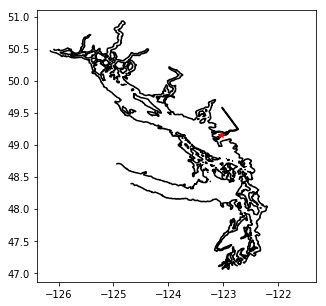

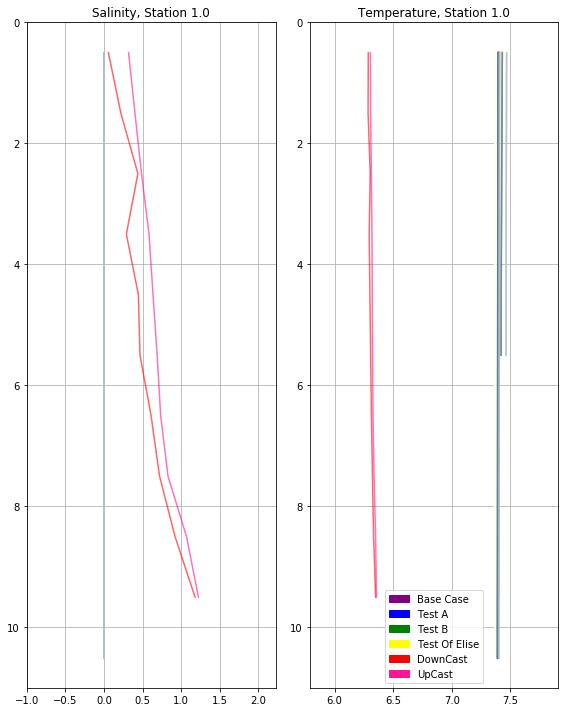

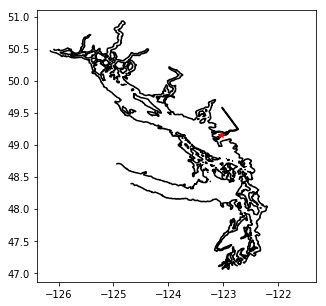

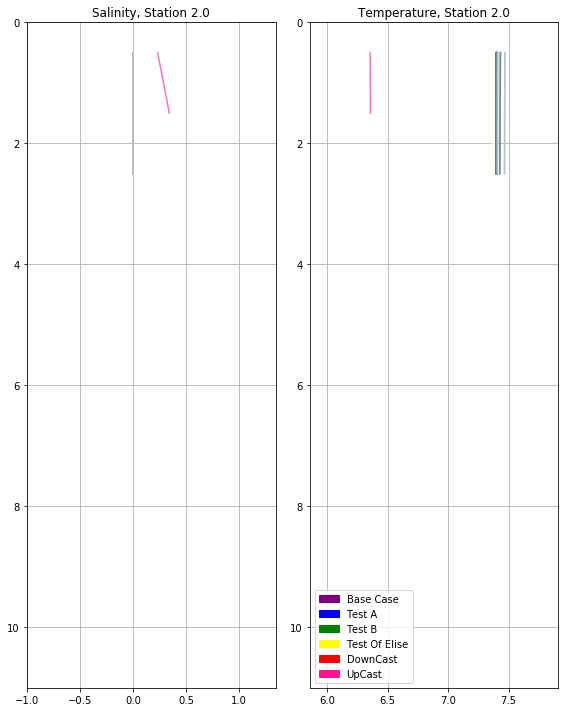

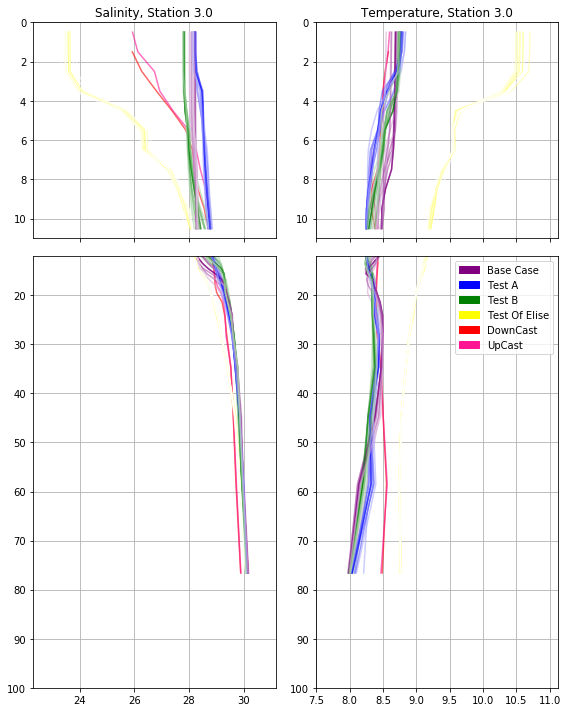

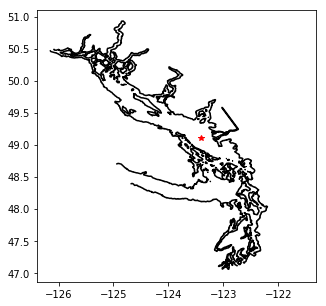

In [15]:
for n in range(5):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

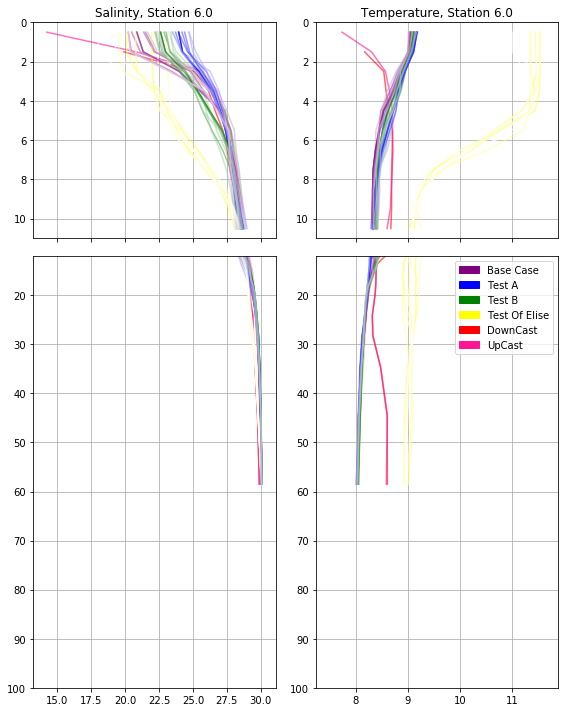

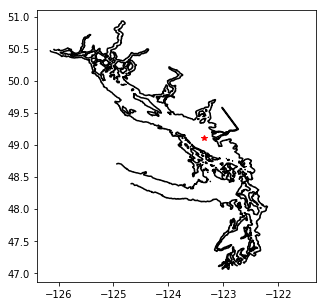

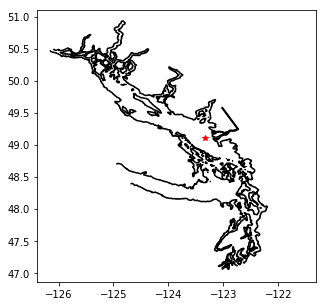

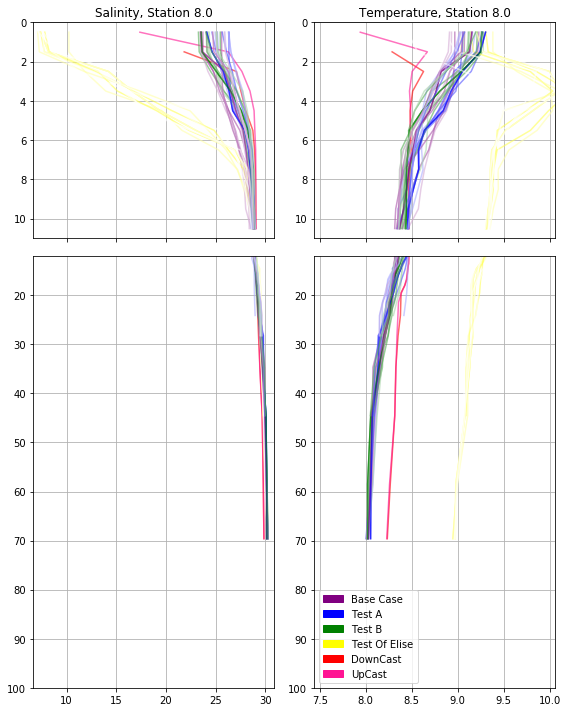

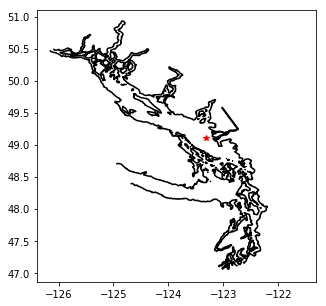

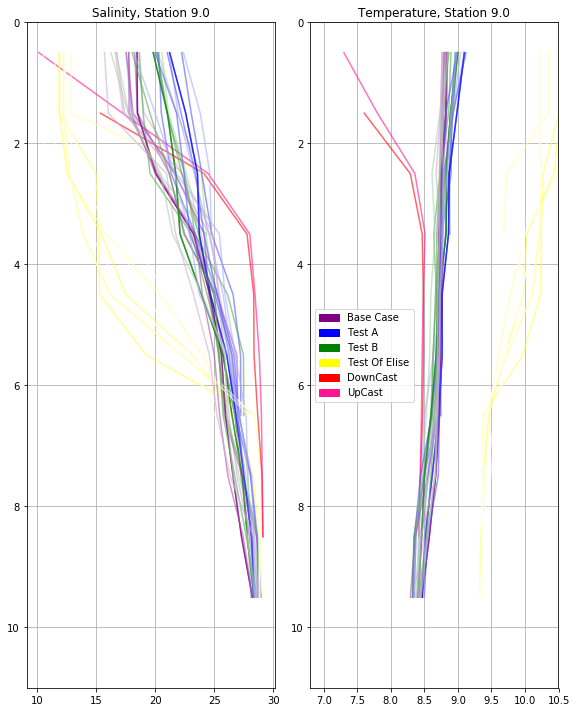

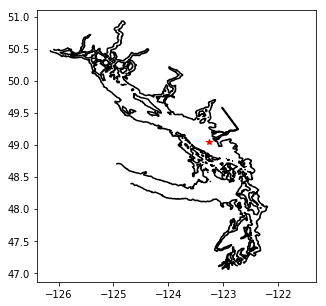

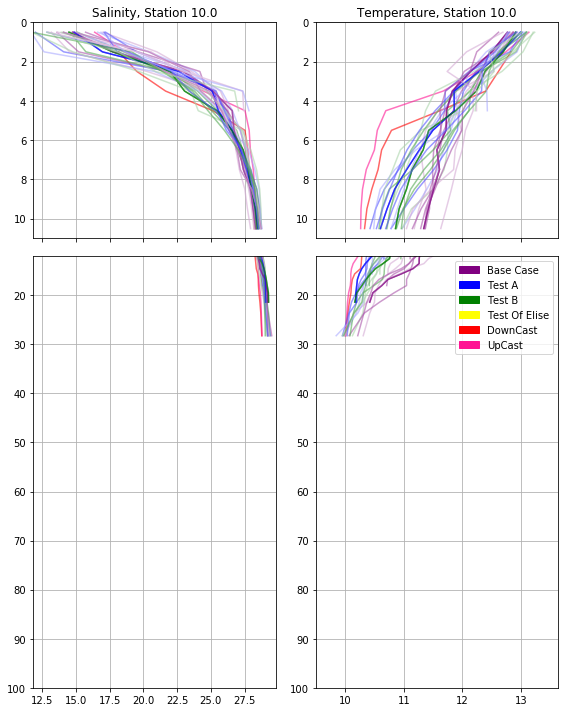

In [16]:
for n in range(5,10):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

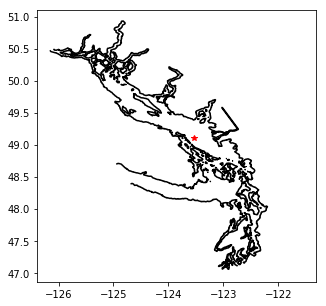

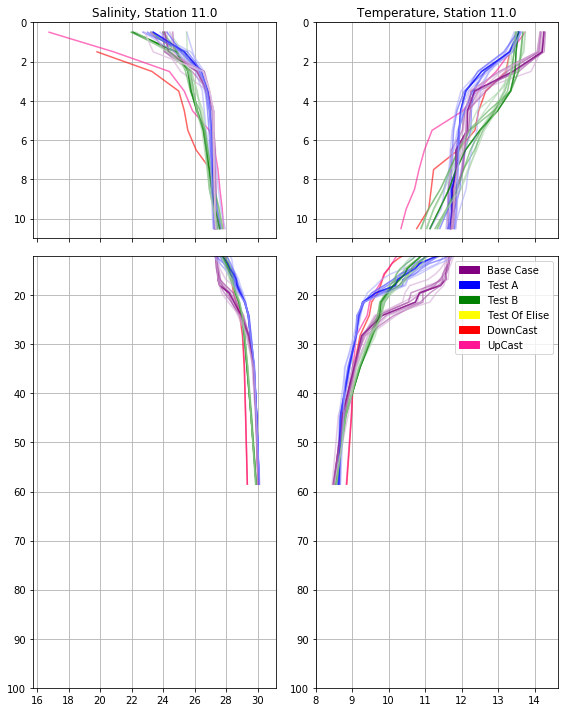

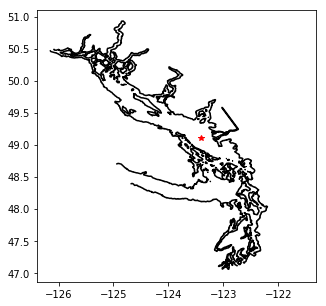

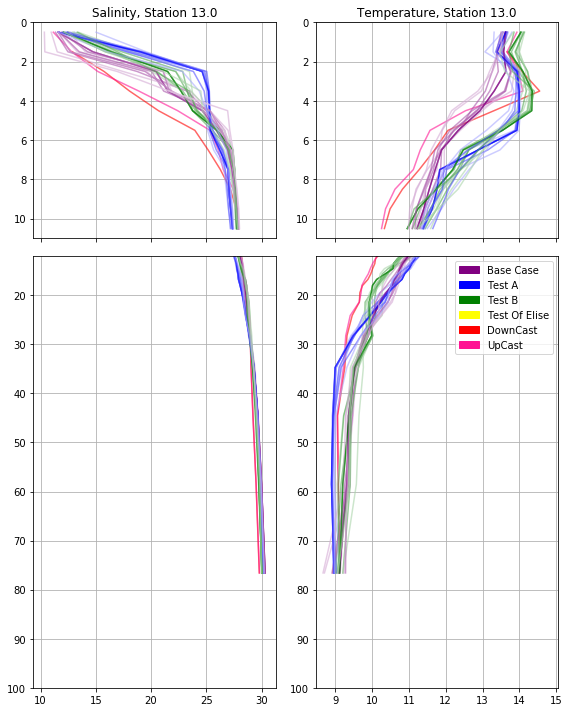

In [17]:
for n in range(10,13):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

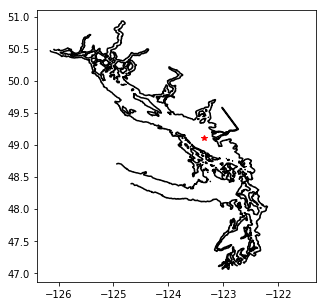

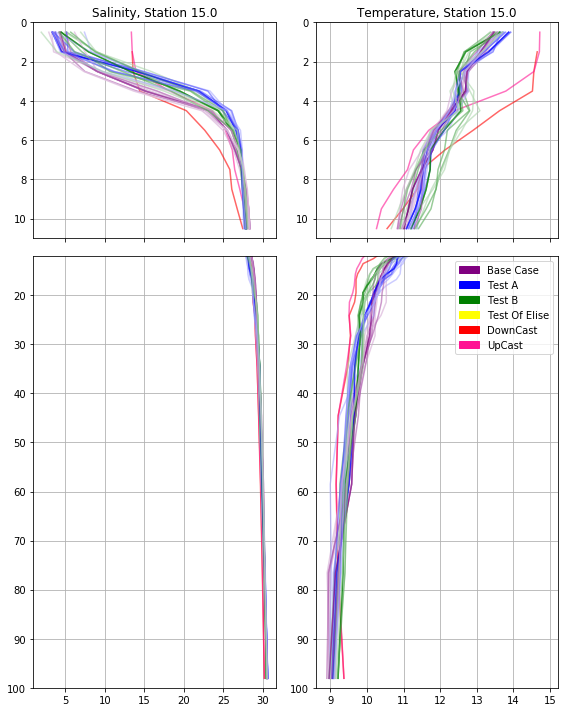

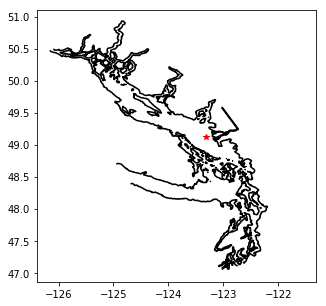

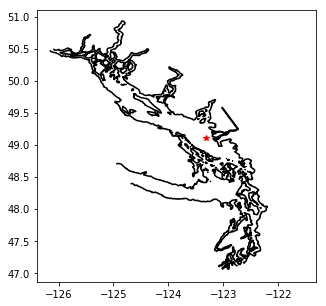

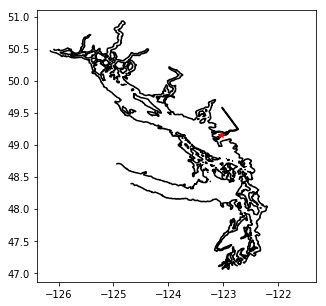

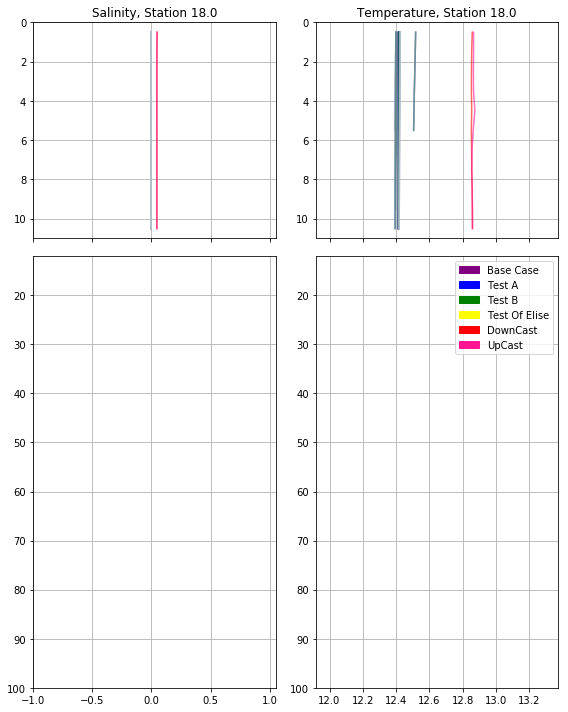

In [18]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare(stationdata.iloc[[n]], tmask);

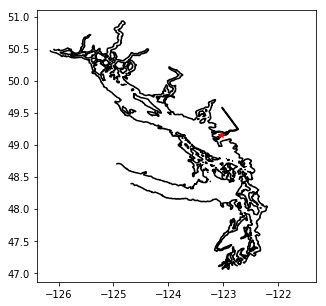

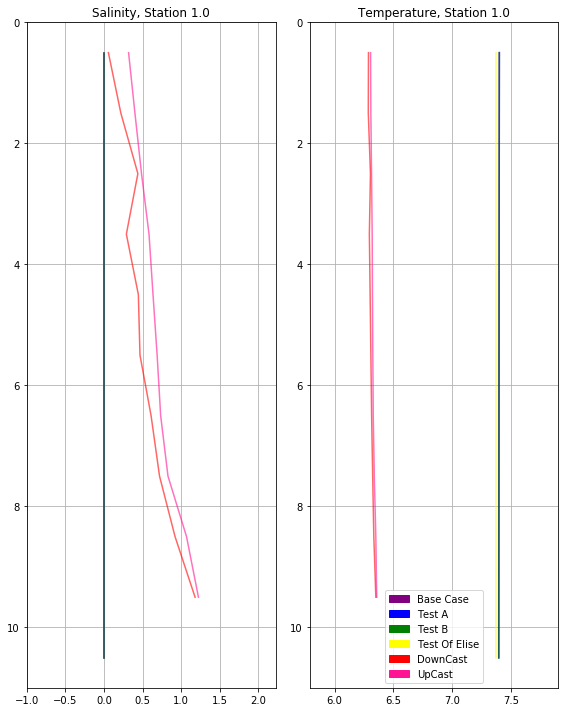

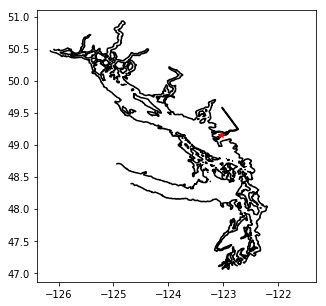

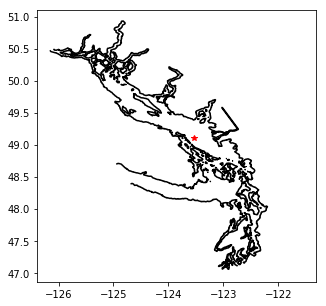

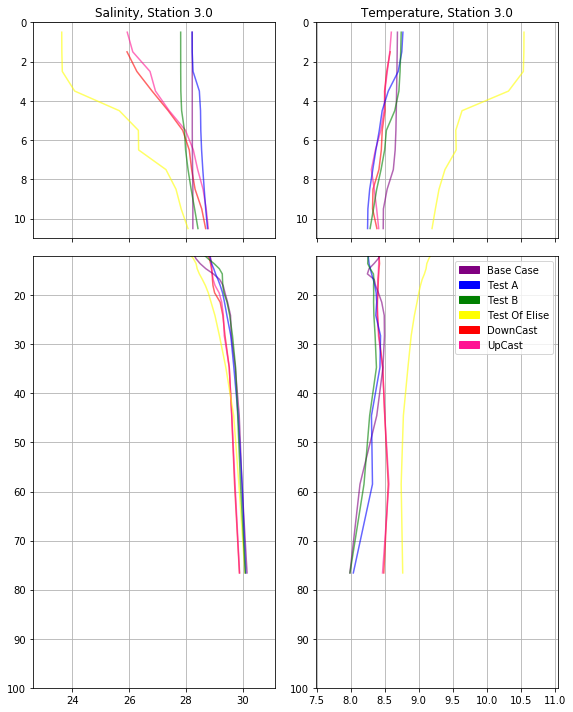

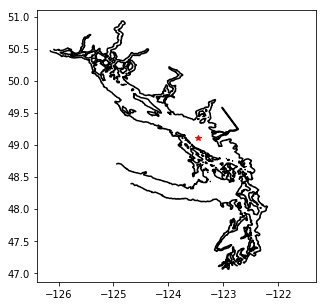

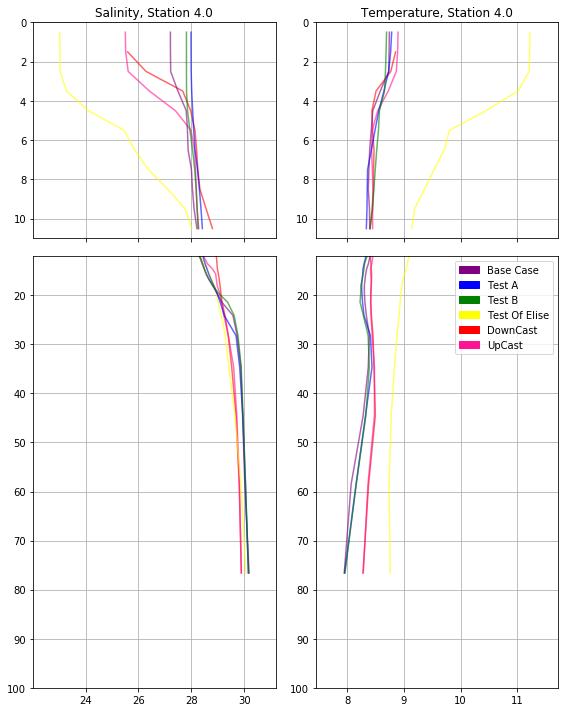

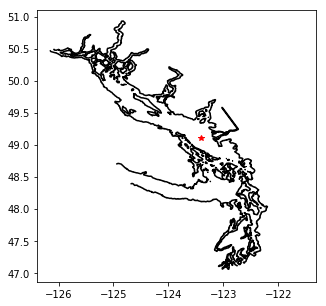

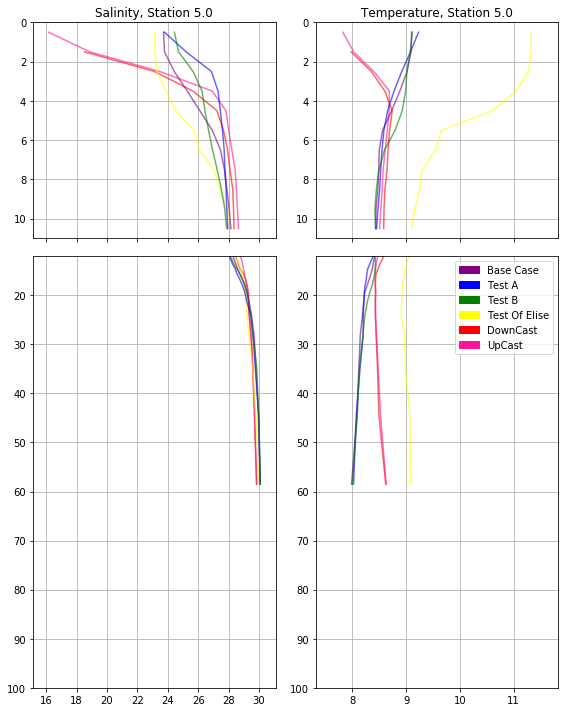

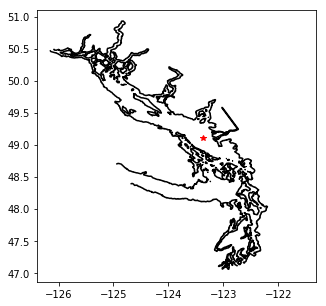

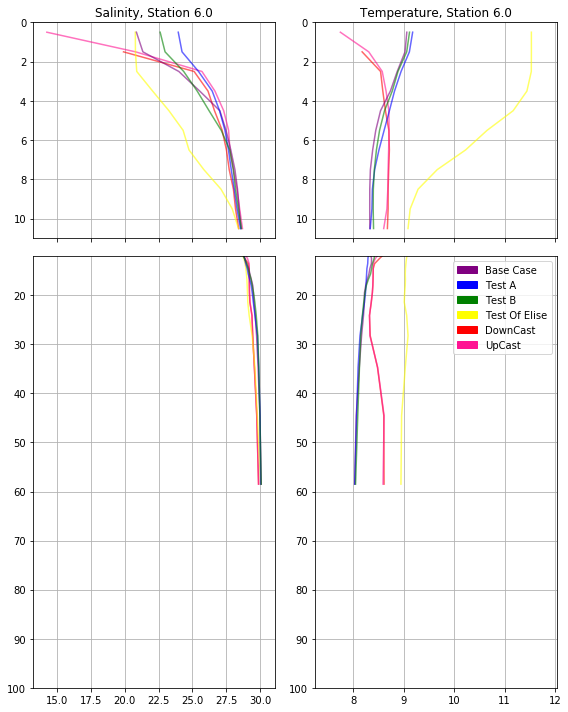

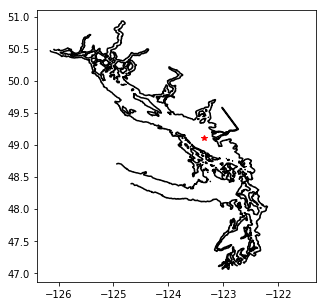

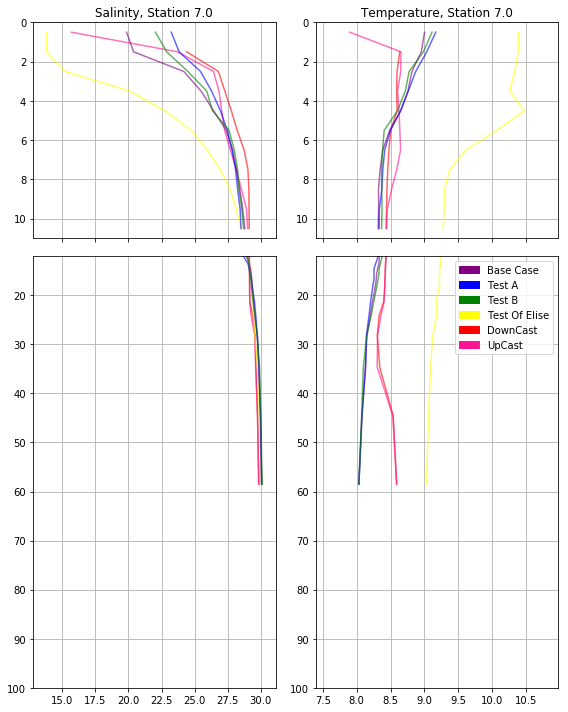

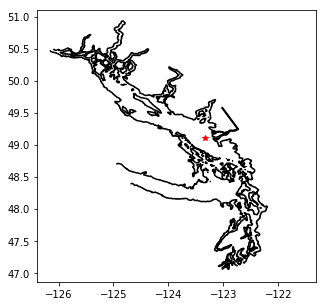

In [19]:
for n in range(8):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

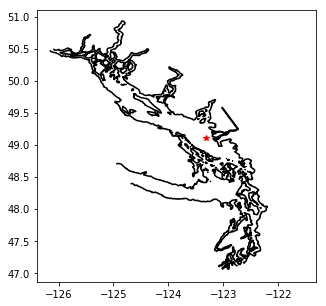

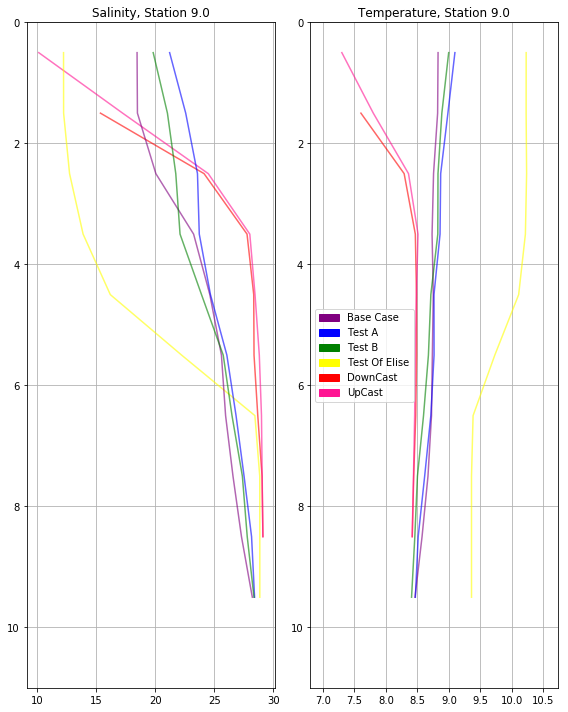

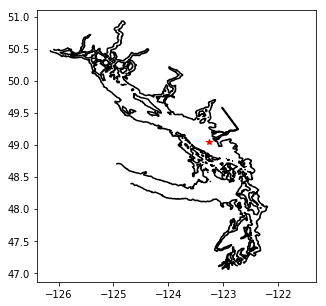

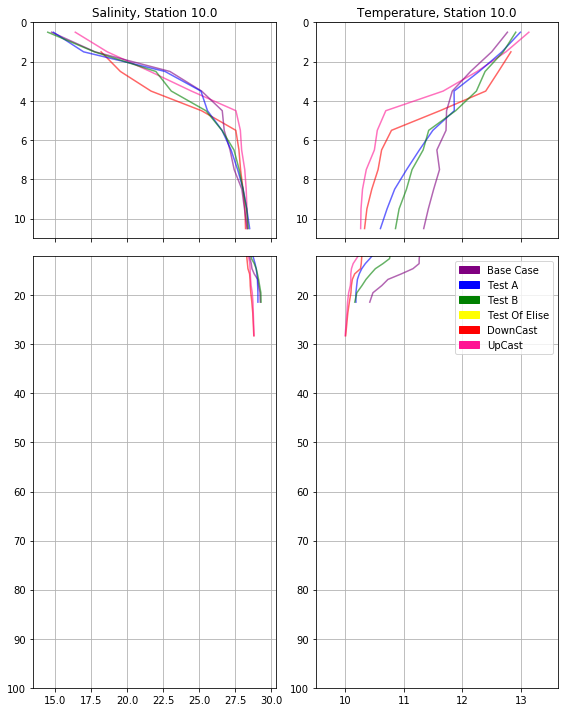

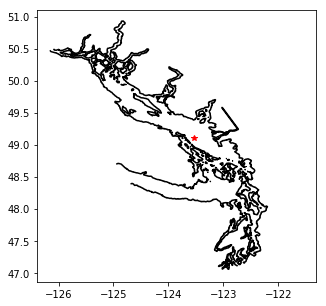

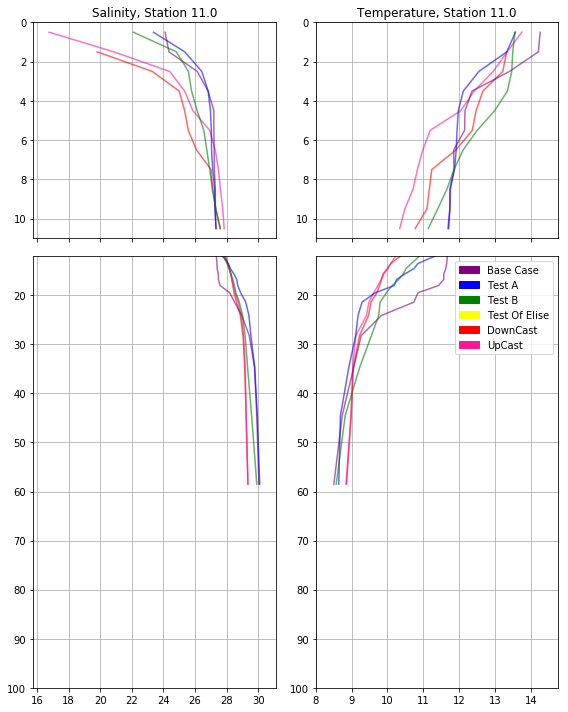

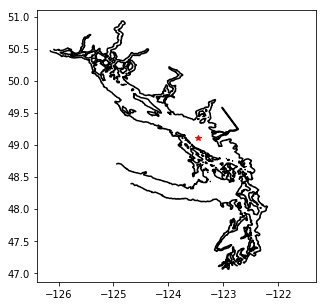

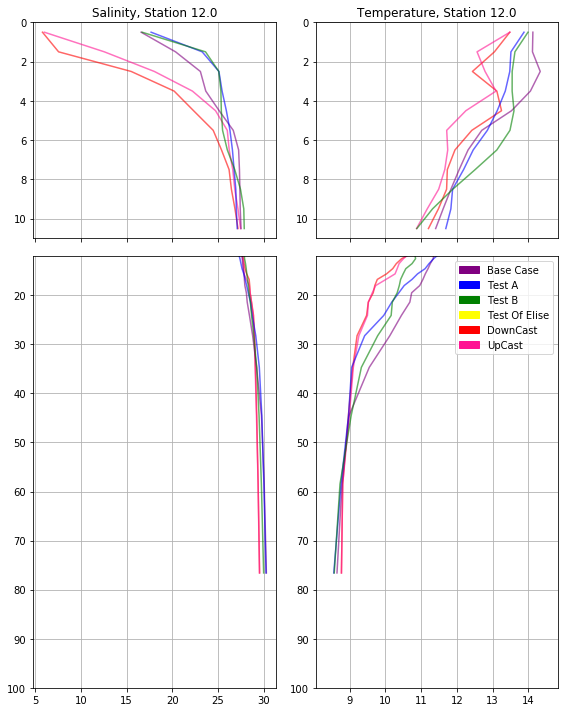

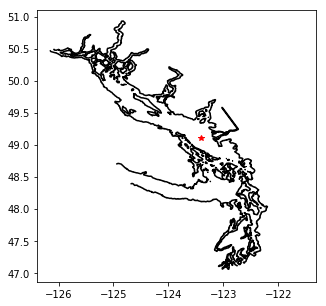

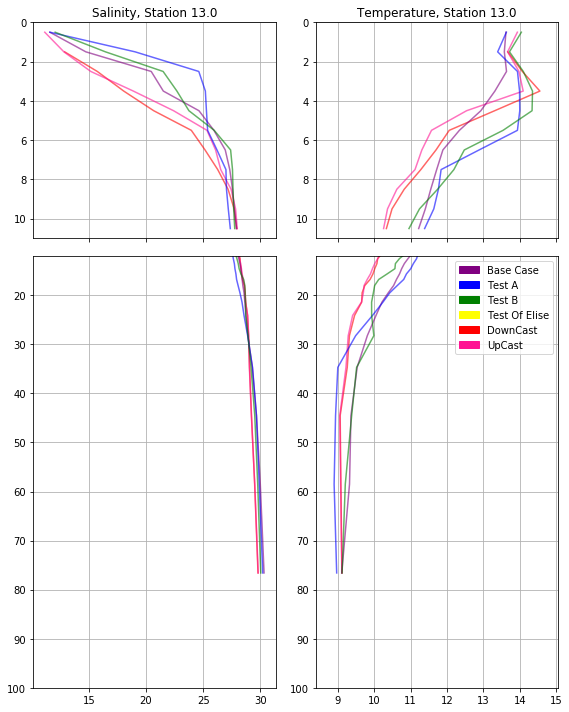

In [20]:
for n in range(8,13):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

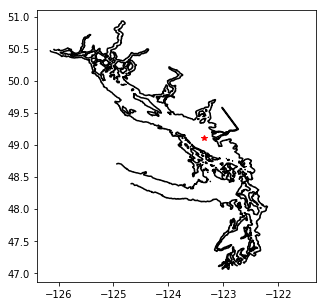

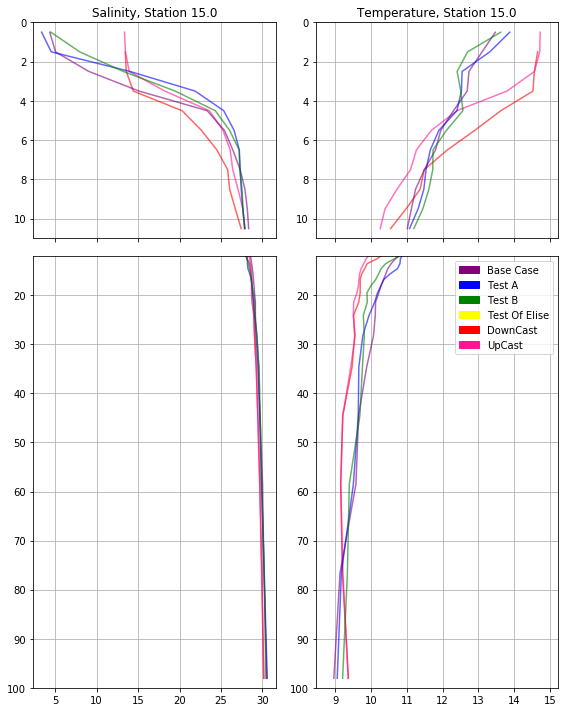

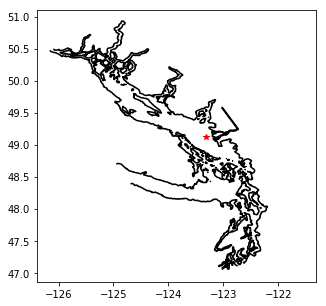

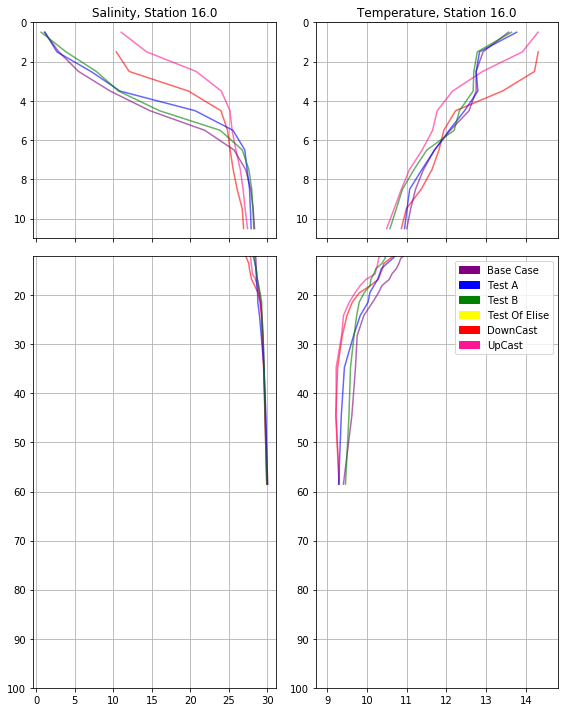

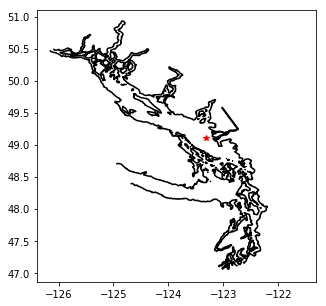

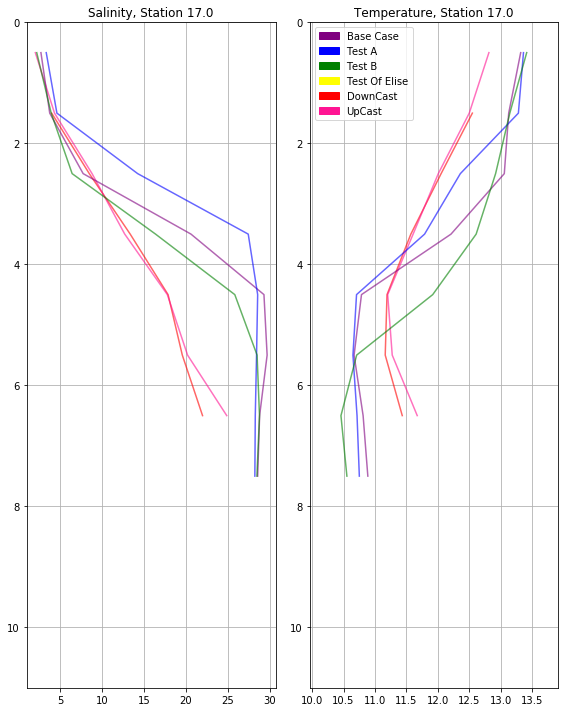

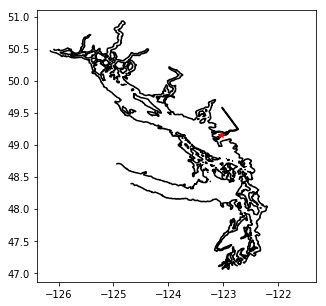

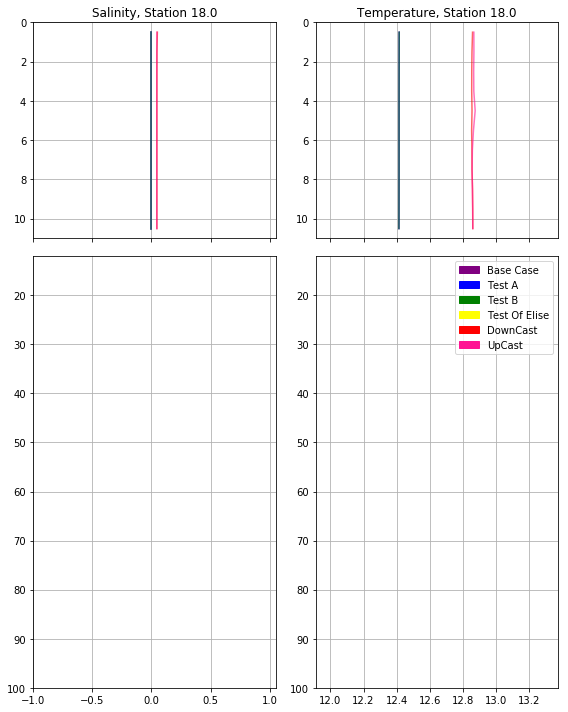

In [21]:
for n in range(15,19):
    where(stationdata.iloc[[n]]);
    compare_closest(stationdata.iloc[[n]], tmask);

In [22]:
obs_sal = np.array([])
model_base_sal = np.array([])
model_a_sal = np.array([])
model_b_sal = np.array([])
obs_temp = np.array([])
model_base_temp = np.array([])
model_a_temp = np.array([])
model_b_temp = np.array([])
for n in range(19):
    if (n != 14):
        if n != 13:
            print(n)
            station = stationdata.iloc[[n]]
            cast = casts[station['Station'].values[0]]
            Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                            station['LatDecDeg'].values[0],
                                                            X, Y, land_mask = bathy.mask)
            shape_depth = cast.uCast['depth_m'].values.shape[0]
            if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
                if station['Date'].values == 20170410:
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
                else: 
                    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
                    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

                deptht = base.variables['deptht'][:shape_depth]
                pt_mask = tmask[0,:shape_depth,Yind,Xind]
                cast_sal_down = np.ma.masked_array(cast.dCast['gsw_srA0'].values,
                                                   mask = 1 - pt_mask)
                cast_sal_up = np.ma.masked_array(cast.uCast['gsw_srA0'].values,
                                                 mask = 1 - pt_mask)
                cast_temp_down = np.ma.masked_array(cast.dCast['gsw_ctA0'].values,
                                                    mask = 1 - pt_mask)
                cast_temp_up = np.ma.masked_array(cast.uCast['gsw_ctA0'].values, 
                                                  mask = 1 - pt_mask)
                if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
                    delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
                else:
                    delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
                    before = int(station['Time_UTC_hhmmss'].values[0][:2])
                masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
                base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                              mask = 1-pt_mask)
                a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                                           mask = 1-pt_mask)
                base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                               mask = 1-pt_mask)
                a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                            mask = 1-pt_mask)
                m_cast_temp_up2 = np.ma.masked_invalid(cast_temp_up)
                m_cast_temp_down2 = np.ma.masked_invalid(cast_temp_down)
                m_cast_sal_up2 = np.ma.masked_invalid(cast_sal_up)
                m_cast_sal_down2 = np.ma.masked_invalid(cast_sal_down)
                obs_sal = np.append(obs_sal, np.append(m_cast_sal_up2, m_cast_sal_down2))
                model_base_sal = np.append(model_base_sal, np.append(base_sal, base_sal))
                model_a_sal = np.append(model_a_sal, np.append(a_sal, a_sal))
                model_b_sal = np.append(model_b_sal, np.append(b_sal, b_sal))
                obs_temp = np.append(obs_temp, np.append(m_cast_temp_up2, m_cast_temp_down2))
                model_base_temp = np.append(model_base_temp, np.append(base_temp, base_temp))
                model_a_temp = np.append(model_a_temp, np.append(a_temp, a_temp))
                model_b_temp = np.append(model_b_temp, np.append(b_temp, b_temp))

0
1
2
3
4
5
6
7
8
9
10
11
12
15
16
17
18


In [23]:
station = stationdata.iloc[[13]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.dCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.dCast['gsw_srA0'].values
    cast_temp_down = cast.dCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

station = stationdata.iloc[[14]]
cast = casts[station['Station'].values[0]]
Yind, Xind = geo_tools.find_closest_model_point(station['LonDecDeg'].values[0], 
                                                station['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
shape_depth = cast.uCast['depth_m'].values.shape[0]
if mesh.variables['tmask'][0,0,Yind, Xind] == 1:
    
    base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')

    deptht = base.variables['deptht'][:shape_depth]
    cast_sal_down = cast.uCast['gsw_srA0'].values
    cast_temp_down = cast.uCast['gsw_ctA0'].values
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    m_cast_sal_down = np.ma.masked_array(cast_sal_down, mask = 1-pt_mask)
    m_cast_temp_down = np.ma.masked_array(cast_temp_down, mask = 1-pt_mask)
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)

obs_sal = np.append(obs_sal,  m_cast_sal_down)
model_base_sal = np.append(model_base_sal, base_sal)
model_a_sal = np.append(model_a_sal, a_sal)
model_b_sal = np.append(model_b_sal,  b_sal)
obs_temp = np.append(obs_temp, m_cast_temp_down)
model_base_temp = np.append(model_base_temp, base_temp)
model_a_temp = np.append(model_a_temp,  a_temp)
model_b_temp = np.append(model_b_temp,  b_temp)

In [24]:
m_obs_sal = np.ma.masked_invalid(obs_sal)
m_obs_temp = np.ma.masked_invalid(obs_temp)

In [25]:
m_model_base_sal = np.ma.masked_array(model_base_sal, mask = m_obs_sal.mask)
m_model_a_sal = np.ma.masked_array(model_a_sal, mask = m_obs_sal.mask)
m_model_b_sal = np.ma.masked_array(model_b_sal, mask = m_obs_sal.mask)
m_model_base_temp = np.ma.masked_array(model_base_temp, mask = m_obs_temp.mask)
m_model_a_temp = np.ma.masked_array(model_a_temp, mask = m_obs_temp.mask)
m_model_b_temp = np.ma.masked_array(model_b_temp, mask = m_obs_temp.mask)

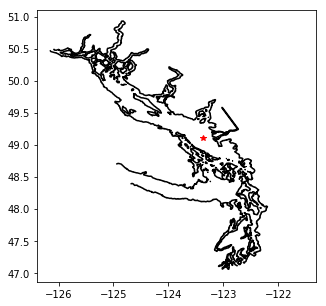

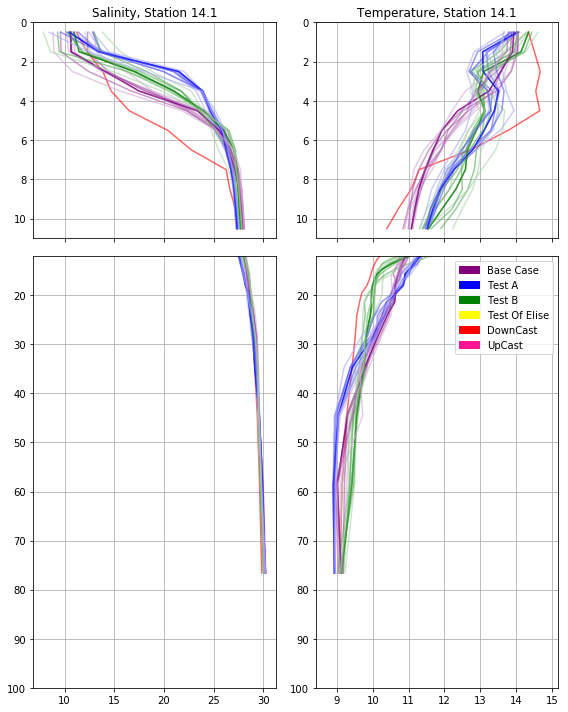

In [26]:
where(stationdata.iloc[[13]])
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Base Case')
blue_patch = mpatches.Patch(color='blue', label='Test A')
green_patch = mpatches.Patch(color='green', label='Test B')
yellow_patch = mpatches.Patch(color='yellow', label='Test Of Elise')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch, blue_patch, green_patch, yellow_patch, 
                      red_patch, pink_patch])
fig.tight_layout()

In [27]:
cast = casts[14.1]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[13]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[13]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.dCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.dCast['depth_m'].values
cast_sal_down = cast.dCast['gsw_srA0'].values
cast_temp_down = cast.dCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[13]]['Time_UTC_hhmmss'].values[0][:2])

pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.1')
ax[0,1].set_title('Temperature, Station 14.1')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Base Case')
blue_patch = mpatches.Patch(color='blue', label='Test A')
green_patch = mpatches.Patch(color='green', label='Test B')
yellow_patch = mpatches.Patch(color='yellow', label='Test Of Elise')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch, blue_patch, green_patch, yellow_patch, 
                      red_patch, pink_patch])
fig.tight_layout()

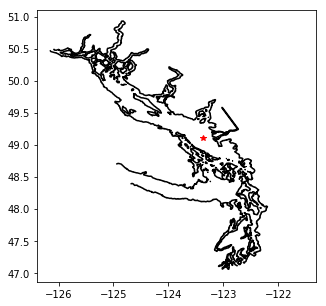

In [28]:
where(stationdata.iloc[[14]])
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
n = 1
for j in range(Yind - 2, Yind + 3):
    pt_mask = tmask[0,:shape_depth,j,Xind]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,j, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,j, Xind],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,j, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,j,Xind], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,j, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,j, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,j,Xind], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[n], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[n], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[n], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[n], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[n], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[n], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[n], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[n], alpha = 0.6)
    n = n + 1
m = 1
for i in range(Xind - 2, Xind + 3):
    pt_mask = tmask[0,:shape_depth,Yind,i]
    masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, i]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, i],
                                  mask = 1-pt_mask)
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, i]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,i], 
                               mask = 1-pt_mask)
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, i]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                   mask = 1-pt_mask)
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, i]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,i], 
                                mask = 1-pt_mask)
    ax[0,0].plot(base_sal[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,0].plot(a_sal[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,0].plot(b_sal[:11], deptht[:11], color= greens[m], alpha = 0.6)
    ax[1,0].plot(base_sal[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,0].plot(a_sal[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,0].plot(b_sal[11:], deptht[11:], color= greens[m], alpha = 0.6)
    ax[0,1].plot(base_temp[:11], deptht[:11], color = purples[m], alpha = 0.6)
    ax[0,1].plot(a_temp[:11], deptht[:11], color = blues[m], alpha = 0.6)
    ax[0,1].plot(b_temp[:11], deptht[:11], color = greens[m], alpha = 0.6)
    ax[1,1].plot(base_temp[11:], deptht[11:], color = purples[m], alpha = 0.6)
    ax[1,1].plot(a_temp[11:], deptht[11:], color = blues[m], alpha = 0.6)
    ax[1,1].plot(b_temp[11:], deptht[11:], color = greens[m], alpha = 0.6)
    m = m + 1
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Base Case')
blue_patch = mpatches.Patch(color='blue', label='Test A')
green_patch = mpatches.Patch(color='green', label='Test B')
yellow_patch = mpatches.Patch(color='yellow', label='Test Of Elise')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch, blue_patch, green_patch, yellow_patch, 
                      red_patch, pink_patch])
fig.tight_layout()

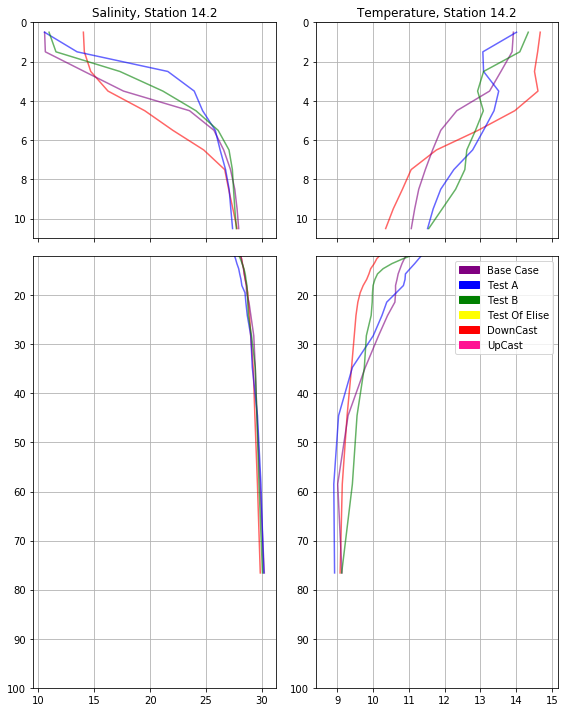

In [29]:
cast = casts[14.2]
Yind, Xind = geo_tools.find_closest_model_point(stationdata.iloc[[14]]['LonDecDeg'].values[0], 
                                                stationdata.iloc[[14]]['LatDecDeg'].values[0],
                                                X, Y, land_mask = bathy.mask)
base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
shape_depth = cast.uCast['depth_m'].values.shape[0]
fig, ax = plt.subplots(2,2,figsize = (8,10), gridspec_kw = {'height_ratios':[1, 2]} )
deptht = cast.uCast['depth_m'].values
cast_sal_down = cast.uCast['gsw_srA0'].values
cast_temp_down = cast.uCast['gsw_ctA0'].values
ax[0,0].plot(cast_sal_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,0].plot(cast_sal_down[11:], deptht[11:], 'r-', alpha = 0.6)
ax[0,1].plot(cast_temp_down[:11], deptht[:11], 'r-', alpha = 0.6)
ax[1,1].plot(cast_temp_down[11:], deptht[11:], 'r-', alpha = 0.6)
if int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) < 30:
    delta = (30 + int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5])) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2]) - 1
else:
    delta = (int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
    before = int(stationdata.iloc[[14]]['Time_UTC_hhmmss'].values[0][:2])
pt_mask = tmask[0,:shape_depth,Yind,Xind]
masked_depth = np.ma.masked_array(deptht, mask = 1-pt_mask)
base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                              + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                              mask = 1-pt_mask)
a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                           +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                           mask = 1-pt_mask)
base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                            +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                            mask = 1-pt_mask)
ax[0,0].plot(base_sal[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,0].plot(a_sal[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,0].plot(b_sal[:11], deptht[:11], color= 'green', alpha = 0.6)
ax[1,0].plot(base_sal[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,0].plot(a_sal[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,0].plot(b_sal[11:], deptht[11:], color= 'green', alpha = 0.6)
ax[0,1].plot(base_temp[:11], deptht[:11], color = 'purple', alpha = 0.6)
ax[0,1].plot(a_temp[:11], deptht[:11], color = 'blue', alpha = 0.6)
ax[0,1].plot(b_temp[:11], deptht[:11], color = 'green', alpha = 0.6)
ax[1,1].plot(base_temp[11:], deptht[11:], color = 'purple', alpha = 0.6)
ax[1,1].plot(a_temp[11:], deptht[11:], color = 'blue', alpha = 0.6)
ax[1,1].plot(b_temp[11:], deptht[11:], color = 'green', alpha = 0.6)
min_sal = np.nanmin(np.array([ np.nanmin(cast_sal_down), 
                              np.nanmin(base_sal), np.nanmin(a_sal), np.nanmin(b_sal)]))
max_sal = np.nanmax(np.array([ np.nanmax(cast_sal_down), 
                              np.nanmax(base_sal), np.nanmax(a_sal), np.nanmax(b_sal)]))
min_temp = np.nanmin(np.array([np.nanmin(cast_temp_down), 
                             np.nanmin(base_temp),np.nanmin(a_temp), np.nanmin(b_temp)]))
max_temp = np.nanmax(np.array([ np.nanmax(cast_temp_down), 
                             np.nanmax(base_temp),np.nanmax(a_temp), np.nanmax(b_temp)]))
ax[0,0].set_ylim(11,0)
ax[0,1].set_ylim(11,0)
ax[1,0].set_ylim(100,12)
ax[1,1].set_ylim(100,12)
ax[0,0].set_xlim(min_sal-1,max_sal+1)
ax[0,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[1,0].set_xlim(min_sal-1,max_sal+1)
ax[1,1].set_xlim(min_temp-0.5,max_temp+0.5)
ax[0,0].set_title('Salinity, Station 14.2')
ax[0,1].set_title('Temperature, Station 14.2')
ax[0,0].tick_params(labelbottom='off')
ax[0,1].tick_params(labelbottom='off')
ax[0,0].grid('on')
ax[0,1].grid('on')
ax[1,0].grid('on')
ax[1,1].grid('on')
purple_patch = mpatches.Patch(color='purple', label='Base Case')
blue_patch = mpatches.Patch(color='blue', label='Test A')
green_patch = mpatches.Patch(color='green', label='Test B')
yellow_patch = mpatches.Patch(color='yellow', label='Test Of Elise')
red_patch = mpatches.Patch(color = 'red', label = 'DownCast')
pink_patch = mpatches.Patch(color = 'deeppink', label = 'UpCast')
plt.legend(handles = [purple_patch, blue_patch, green_patch, yellow_patch, 
                      red_patch, pink_patch])
fig.tight_layout()

In [212]:
ups_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_temperature = np.ma.masked_array(np.zeros((19, 27)), mask = True)
ups_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
downs_salinity = np.ma.masked_array(np.zeros((19, 27)), mask = True)
for n in range(19):
    length_up = casts[stationdata['Station'].values[n]].uCast['depth_m'].values.shape[0]
    length_down = casts[stationdata['Station'].values[n]].dCast['depth_m'].values.shape[0]
    ups_sals = casts[stationdata['Station'].values[n]].uCast['gsw_srA0'].values
    down_sals = casts[stationdata['Station'].values[n]].dCast['gsw_srA0'].values
    ups_temps = casts[stationdata['Station'].values[n]].uCast['gsw_ctA0'].values
    down_temps = casts[stationdata['Station'].values[n]].dCast['gsw_ctA0'].values
    for m in range(length_up):
        ups_temperature[n,m].mask = False
        ups_salinity[n,m].mask = False
        ups_temperature[n,m] = ups_temps[m]
        ups_salinity[n,m] = ups_sals[m]
    for f in range(length_down):
        downs_temperature[n,f].mask = False
        downs_salinity[n,f].mask = False
        downs_temperature[n,f] = down_temps[f]
        downs_salinity[n,f] = down_sals[f] 

In [214]:
model_f_temp = np.ma.masked_array(np.zeros((9,27)), mask = True)
model_f_sal = np.ma.masked_array(np.zeros((9,27)), mask = True)
for n in range(9):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    f_sal = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                               +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_f_sal[n,m].mask = False
        model_f_sal[n,m] = f_sal[m]
    f_temp = np.ma.masked_array(delta*f_temps[before,:shape_depth,Yind, Xind]
                                +(1-delta)*f_temps[before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_f_temp[n,m].mask = False
        model_f_temp[n,m] = f_temp[m]

0
1
2
3
4
5
6
7
8


In [216]:
model_base_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_base_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_a_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_a_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_b_temp = np.ma.masked_array(np.zeros((19,27)), mask = True)
model_b_sal = np.ma.masked_array(np.zeros((19,27)), mask = True)
for n in range(19):
    print(n)
    station = stationdata.iloc[[n]]
    cast = casts[stationdata['Station'].values[n]]
    Yind, Xind = geo_tools.find_closest_model_point(stationdata['LonDecDeg'].values[n], 
                                                    stationdata['LatDecDeg'].values[n],
                                                    X, Y, land_mask = bathy.mask)
    if station['Date'].values == 20170410:
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
    else: 
        base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
        testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
    if n ==13:
        shape_depth = cast.dCast['depth_m'].values.shape[0]
    else:
        shape_depth = cast.uCast['depth_m'].values.shape[0]
    if int(station['Time_UTC_hhmmss'].values[0][3:5]) < 30:
        delta = (30 + int(station['Time_UTC_hhmmss'].values[0][3:5])) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2]) - 1
    else:
        delta = (int(station['Time_UTC_hhmmss'].values[0][3:5]) - 30) / 60
        before = int(station['Time_UTC_hhmmss'].values[0][:2])
    pt_mask = tmask[0,:shape_depth,Yind,Xind]
    ups_temperature[n,:] = np.ma.masked_array(ups_temperature[n,:], mask = 1-tmask[0,:27,Yind,Xind])
    downs_temperature[n,:] = np.ma.masked_array(downs_temperature[n,:], mask = 1 - tmask[0,:27,Yind,Xind])
    ups_salinity[n,:] = np.ma.masked_array(ups_salinity[n, :], mask = 1- tmask[0,:27,Yind,Xind])
    downs_salinity[n,:] = np.ma.masked_array(downs_salinity[n,:], mask = 1 - tmask[0,:27,Yind,Xind])
    base_sal = np.ma.masked_array(delta * base.variables['vosaline'][before,:shape_depth,Yind, Xind]
                                  + (1-delta)*base.variables['vosaline'][before+1,:shape_depth,Yind, Xind],
                                  mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_sal[n,m].mask = False
        model_base_sal[n,m] = base_sal[m]
    a_sal = np.ma.masked_array(delta*testa.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testa.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_a_sal[n,m].mask = False
        model_a_sal[n,m] = a_sal[m]
    b_sal = np.ma.masked_array(delta*testb.variables['vosaline'][before,:shape_depth,Yind, Xind]
                               +(1-delta)*testb.variables['vosaline'][before+1,:shape_depth,Yind,Xind], 
                               mask = 1-pt_mask)
    for m in range(shape_depth):
        model_b_sal[n,m].mask = False
        model_b_sal[n,m] = b_sal[m]
    base_temp = np.ma.masked_array(delta*base.variables['votemper'][before,:shape_depth,Yind, Xind]
                                   +(1-delta)*base.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                   mask = 1-pt_mask)
    for m in range(shape_depth):
        model_base_temp[n,m].mask = False
        model_base_temp[n,m] = base_temp[m]
    a_temp = np.ma.masked_array(delta*testa.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testa.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_a_temp[n,m].mask = False
        model_a_temp[n,m] = a_temp[m]
    b_temp = np.ma.masked_array(delta*testb.variables['votemper'][before,:shape_depth,Yind, Xind]
                                +(1-delta)*testb.variables['votemper'][before+1,:shape_depth,Yind,Xind], 
                                mask = 1-pt_mask)
    for m in range(shape_depth):
        model_b_temp[n,m].mask = False
        model_b_temp[n,m] = b_temp[m]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [218]:
depths = casts[15].uCast['depth_m'].values

In [244]:
ctd_sals = np.ma.masked_array(np.zeros((38, 27)), mask = True)
ctd_temps = np.ma.masked_array(np.zeros((38,27)), mask = True)
for n in range(27):
    ctd_sals[:,n].mask = np.append(ups_salinity[:,n].mask, downs_salinity[:,n].mask)
    ctd_sals[:,n] = np.append(ups_salinity[:,n], downs_salinity[:,n])
    ctd_temps[:,n].mask = np.append(ups_temperature[:,n].mask, downs_temperature[:,n].mask)
    ctd_temps[:,n] = np.append(ups_temperature[:,n], downs_temperature[:,n])
ctd_sals = np.ma.masked_equal(ctd_sals, 0)
ctd_temps = np.ma.masked_equal(ctd_temps, 0)
ctd_sals = np.ma.masked_invalid(ctd_sals)
ctd_temps = np.ma.masked_invalid(ctd_temps)

In [221]:
apr30_ctd_sals = np.ma.masked_array(np.zeros((18, 27)), mask = True)
apr30_ctd_temps = np.ma.masked_array(np.zeros((18,27)), mask = True)
for n in range(27):
    apr30_ctd_sals[:,n].mask = np.append(ups_salinity[:9,n].mask, downs_salinity[:9,n].mask)
    apr30_ctd_sals[:,n] = np.append(ups_salinity[:9,n], downs_salinity[:9,n])
    apr30_ctd_temps[:,n].mask = np.append(ups_temperature[:9,n].mask, downs_temperature[:9,n].mask)
    apr30_ctd_temps[:,n] = np.append(ups_temperature[:9,n], downs_temperature[:9,n])
apr30_ctd_sals = np.ma.masked_equal(apr30_ctd_sals, 0)
apr30_ctd_temps = np.ma.masked_equal(apr30_ctd_temps, 0)
apr30_ctd_sals = np.ma.masked_invalid(apr30_ctd_sals)
apr30_ctd_temps = np.ma.masked_invalid(apr30_ctd_temps)

In [223]:
model_a_sal_full = np.zeros((38, 27))
model_a_temp_full = np.zeros((38,27))
model_b_sal_full = np.zeros((38, 27))
model_b_temp_full = np.zeros((38,27))
model_base_sal_full = np.zeros((38, 27))
model_base_temp_full = np.zeros((38,27))
for n in range(27):
    model_a_sal_full[:,n] = np.append(model_a_sal[:,n], model_a_sal[:,n])
    model_b_sal_full[:,n] = np.append(model_b_sal[:,n], model_b_sal[:,n])
    model_base_sal_full[:,n] = np.append(model_base_sal[:,n], model_base_sal[:,n])
    model_a_temp_full[:,n] = np.append(model_a_temp[:,n], model_a_temp[:,n])
    model_b_temp_full[:,n] = np.append(model_b_temp[:,n], model_b_temp[:,n])
    model_base_temp_full[:,n] = np.append(model_base_temp[:,n], model_base_temp[:,n])

In [232]:
model_f_sal_full = np.zeros((18, 27))
model_f_temp_full = np.zeros((18,27))
for n in range(27):
    model_f_sal_full[:,n] = np.append(model_f_sal[:,n], model_f_sal[:,n])
    model_f_temp_full[:,n] = np.append(model_f_temp[:,n], model_f_temp[:,n])

In [233]:
model_a_sal_full_masked = np.ma.masked_array(model_a_sal_full, ctd_sals.mask)
model_b_sal_full_masked = np.ma.masked_array(model_b_sal_full, ctd_sals.mask)
model_base_sal_full_masked = np.ma.masked_array(model_base_sal_full, ctd_sals.mask)
model_a_temp_full_masked = np.ma.masked_array(model_a_temp_full, ctd_temps.mask)
model_b_temp_full_masked = np.ma.masked_array(model_b_temp_full, ctd_temps.mask)
model_base_temp_full_masked = np.ma.masked_array(model_base_temp_full, ctd_temps.mask)

In [234]:
model_f_sal_full_masked = np.ma.masked_array(model_f_sal_full, apr30_ctd_sals.mask)
model_f_temp_full_masked = np.ma.masked_array(model_f_temp_full, apr30_ctd_temps.mask)

In [237]:
model_a_sal_full_masked = np.ma.masked_equal(model_a_sal_full_masked, 0)
model_b_sal_full_masked = np.ma.masked_equal(model_b_sal_full_masked, 0)
model_base_sal_full_masked = np.ma.masked_equal(model_base_sal_full_masked, 0)

In [238]:
model_f_sal_full_masked = np.ma.masked_equal(model_f_sal_full_masked, 0)

In [239]:
model_a_temp_full_masked = np.ma.masked_equal(model_a_temp_full_masked, 0)
model_b_temp_full_masked = np.ma.masked_equal(model_b_temp_full_masked, 0)
model_base_temp_full_masked = np.ma.masked_equal(model_base_temp_full_masked, 0)
model_f_temp_full_masked = np.ma.masked_equal(model_f_temp_full_masked, 0)

In [245]:
ctd_sals.mask = model_a_sal_full_masked.mask
ctd_temps.mask = model_a_temp_full_masked.mask

In [247]:
apr30_ctd_sals.mask = model_f_sal_full_masked.mask
apr30_ctd_temps.mask = model_a_temp_full_masked.mask

In [248]:
base_bias_sal = np.array([np.ma.mean(model_base_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
base_RMSE_sal = np.array([np.sqrt(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_base_sal_full_masked[:,n].count()) for n in range(27)])
base_willmott_sal = np.array([1-(np.sum((model_base_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_base_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
base_bias_temp = np.array([np.ma.mean(model_base_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
base_RMSE_temp = np.array([np.sqrt(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_base_temp_full_masked[:,n].count()) for n in range(27)])
base_willmott_temp = np.array([1-(np.sum((model_base_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_base_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])
a_bias_sal = np.array([np.ma.mean(model_a_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
a_RMSE_sal = np.array([np.sqrt(np.sum((model_a_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_a_sal_full_masked[:,n].count()) for n in range(27)])
a_willmott_sal = np.array([1-(np.sum((model_a_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_a_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_a_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
a_bias_temp = np.array([np.ma.mean(model_a_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
a_RMSE_temp = np.array([np.sqrt(np.sum((model_a_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_a_temp_full_masked[:,n].count()) for n in range(27)])
a_willmott_temp = np.array([1-(np.sum((model_a_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_a_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_a_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])
b_bias_sal = np.array([np.ma.mean(model_b_sal_full_masked[:,n]) 
                      - np.ma.mean(ctd_sals[:,n]) for n in range(27)])
b_RMSE_sal = np.array([np.sqrt(np.sum((model_b_sal_full_masked[:,n] - ctd_sals[:,n])**2)
                     / model_b_sal_full_masked[:,n].count()) for n in range(27)])
b_willmott_sal = np.array([1-(np.sum((model_b_sal_full_masked[:,n] - ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_b_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])) + 
                                     np.abs(model_b_sal_full_masked[:,n] - 
                                            np.mean(ctd_sals[:,n])))**2)) for n in range(27)])
b_bias_temp = np.array([np.ma.mean(model_b_temp_full_masked[:,n]) 
                      - np.ma.mean(ctd_temps[:,n]) for n in range(27)])
b_RMSE_temp = np.array([np.sqrt(np.sum((model_b_temp_full_masked[:,n] - ctd_temps[:,n])**2)
                     / model_b_temp_full_masked[:,n].count()) for n in range(27)])
b_willmott_temp = np.array([1-(np.sum((model_b_temp_full_masked[:,n] - ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])) + 
                                     np.abs(model_b_temp_full_masked[:,n] - 
                                            np.mean(ctd_temps[:,n])))**2)) for n in range(27)])

In [249]:
f_bias_sal = np.array([np.ma.mean(model_f_sal_full_masked[:,n]) 
                      - np.ma.mean(apr30_ctd_sals[:,n]) for n in range(27)])
f_RMSE_sal = np.array([np.sqrt(np.sum((model_f_sal_full_masked[:,n] - apr30_ctd_sals[:,n])**2)
                     / model_f_sal_full_masked[:,n].count()) for n in range(27)])
f_willmott_sal = np.array([1-(np.sum((model_f_sal_full_masked[:,n] - apr30_ctd_sals[:,n])**2)  / 
                             np.sum((np.abs(model_f_sal_full_masked[:,n] - 
                                            np.mean(apr30_ctd_sals[:,n])) + 
                                     np.abs(model_f_sal_full_masked[:,n] - 
                                            np.mean(apr30_ctd_sals[:,n])))**2)) 
                           for n in range(27)])
f_bias_temp = np.array([np.ma.mean(model_f_temp_full_masked[:,n]) 
                      - np.ma.mean(apr30_ctd_temps[:,n]) for n in range(27)])
f_RMSE_temp = np.array([np.sqrt(np.sum((model_f_temp_full_masked[:,n] - apr30_ctd_temps[:,n])**2)
                     / model_f_temp_full_masked[:,n].count()) for n in range(27)])
f_willmott_temp = np.array([1-(np.sum((model_f_temp_full_masked[:,n] - apr30_ctd_temps[:,n])**2)  / 
                             np.sum((np.abs(model_f_temp_full_masked[:,n] - 
                                            np.mean(apr30_ctd_temps[:,n])) + 
                                     np.abs(model_f_temp_full_masked[:,n] - 
                                            np.mean(apr30_ctd_temps[:,n])))**2)) for n in range(27)])

/home/vdo/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/home/vdo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [250]:
number_of_samples = np.array([ctd_sals[:,n].count() for n in range(27)])

In [251]:
number_of_samples_apr30 = np.array([apr30_ctd_sals[:,n].count() for n in range(27)])

In [252]:
a = pd.DataFrame()
a = a.assign(depth_m = depths)
b = a.assign(base_case_bias_sal = base_bias_sal)
b = b.assign(base_case_rmse_sal = base_RMSE_sal)
b = b.assign(base_case_willmott_sal = base_willmott_sal)
b = b.assign(testa_bias_sal = a_bias_sal)
b = b.assign(testa_rmse_sal = a_RMSE_sal)
b = b.assign(testa_willmott_sal = a_willmott_sal)
b = b.assign(testb_bias_sal = b_bias_sal)
b = b.assign(testb_rmse_sal = b_RMSE_sal)
b = b.assign(testb_willmott_sal = b_willmott_sal)
b = b.assign(base_case_bias_temp = base_bias_temp)
b = b.assign(base_case_rmse_temp = base_RMSE_temp)
b = b.assign(base_case_willmott_temp = base_willmott_temp)
b = b.assign(testa_bias_temp = a_bias_temp)
b = b.assign(testa_RMSE_temp = a_RMSE_temp)
b = b.assign(testa_willmott_temp = a_willmott_temp)
b = b.assign(testb_bias_temp = b_bias_temp)
b = b.assign(testb_rmse_temp = b_RMSE_temp)
b = b.assign(testb_willmott_temp = b_willmott_temp)
b = b.assign(number_of_points = number_of_samples)
b = b.assign(testf_bias_sal = f_bias_sal)
b = b.assign(testf_rmse_sal = f_RMSE_sal)
b = b.assign(testf_willmott_sal = f_willmott_sal)
b = b.assign(testf_bias_temp = f_bias_temp)
b = b.assign(testf_RMSE_temp = f_RMSE_temp)
b = b.assign(testf_willmott_temp = f_willmott_temp)
b = b.assign(apr30_number_of_points = number_of_samples_apr30)

In [253]:
b.keys()

Index(['depth_m', 'base_case_bias_sal', 'base_case_rmse_sal',
       'base_case_willmott_sal', 'testa_bias_sal', 'testa_rmse_sal',
       'testa_willmott_sal', 'testb_bias_sal', 'testb_rmse_sal',
       'testb_willmott_sal', 'base_case_bias_temp', 'base_case_rmse_temp',
       'base_case_willmott_temp', 'testa_bias_temp', 'testa_RMSE_temp',
       'testa_willmott_temp', 'testb_bias_temp', 'testb_rmse_temp',
       'testb_willmott_temp', 'number_of_points', 'testf_bias_sal',
       'testf_rmse_sal', 'testf_willmott_sal', 'testf_bias_temp',
       'testf_RMSE_temp', 'testf_willmott_temp', 'apr30_number_of_points'],
      dtype='object')

In [254]:
b[['depth_m', 'base_case_bias_sal', 'testa_bias_sal', 'testb_bias_sal', 'number_of_points',
  'testf_bias_sal', 'apr30_number_of_points']]

depth_m  base_case_bias_sal  testa_bias_sal  testb_bias_sal  \
0    0.500000            2.331150        2.744630        2.525709   
1    1.500003            0.445169        1.509270        1.399367   
2    2.500011           -0.179990        1.340164        0.619086   
3    3.500031           -0.692768        0.914604       -0.061771   
4    4.500071           -0.350541        0.661808       -0.327436   
5    5.500151           -0.008461        0.594032        0.200338   
6    6.500310            0.052728        0.412166        0.356511   
7    7.500623            0.082633        0.057861        0.109135   
8    8.501236            0.067053       -0.030239        0.031312   
9    9.502433           -0.016726       -0.149969       -0.052287   
10  10.504766            0.011875       -0.137479       -0.023424   
11  11.509312           -0.040733       -0.157644       -0.073707   
12  12.518167           -0.071657       -0.154023       -0.058789   
13  13.535412           -0.082932       -0.131305       -0.013714   
14  14.568982           -0.054344       -0.093694        0.041335   
15  15.634288           -0.017584       -0.051224        0.081942   
16  16.761173           -0.002108       -0.022767        0.100318   
17  18.007135            0.014557       -0.013709        0.106757   
18  19.481785            0.058543        0.023350        0.129618   
19  21.389978            0.083631        0.048705        0.155823   
20  24.100256            0.090191        0.054879        0.097930   
21  28.229916            0.175562        0.191784        0.160084   
22  34.685757            0.245785        0.256177        0.232940   
23  44.517723            0.298691        0.323290        0.243956   
24  58.484333            0.329164        0.314560        0.248802   
25  76.585587            0.392003        0.358036        0.282415   
26  98.062958            0.353263        0.414413        0.246730   

    number_of_points  testf_bias_sal  apr30_number_of_points  
0                 20       -3.042428                      10  
1                 34       -7.521166                      18  
2                 32      -12.324750                      16  
3                 32      -13.589161                      16  
4                 32      -14.383141                      16  
5                 32      -15.099945                      16  
6                 32      -15.480596                      16  
7                 30      -15.822754                      16  
8                 30      -16.076209                      16  
9                 28      -15.764218                      14  
10                26      -19.556623                      12  
11                26      -19.657434                      12  
12                26      -19.762950                      12  
13                26      -19.845620                      12  
14                26      -19.911509                      12  
15                26      -19.970439                      12  
16                26      -20.017239                      12  
17                26      -20.057748                      12  
18                26      -20.124312                      12  
19                26      -20.196219                      12  
20                24      -20.294047                      12  
21                24      -20.413056                      12  
22                24      -20.569481                      12  
23                24      -20.749826                      12  
24                24      -20.897110                      12  
25                14      -21.045588                       6  
26                 2             NaN                       0

In [255]:
b[['depth_m', 'base_case_rmse_sal', 'testa_rmse_sal', 'testb_rmse_sal', 'number_of_points',
  'testf_rmse_sal', 'apr30_number_of_points']]

depth_m  base_case_rmse_sal  testa_rmse_sal  testb_rmse_sal  \
0    0.500000            6.583792        7.253793        6.806331   
1    1.500003            5.117737        6.003672        5.345078   
2    2.500011            4.110813        4.936148        3.961681   
3    3.500031            3.704265        4.511354        3.883578   
4    4.500071            3.345040        2.608781        3.139918   
5    5.500151            1.742258        1.680764        1.569769   
6    6.500310            1.278312        1.234344        1.301537   
7    7.500623            0.737824        0.648945        0.782541   
8    8.501236            0.713324        0.584020        0.707149   
9    9.502433            0.628749        0.529928        0.616091   
10  10.504766            0.476097        0.416505        0.450917   
11  11.509312            0.436066        0.420280        0.399194   
12  12.518167            0.400871        0.397801        0.332942   
13  13.535412            0.360662        0.379173        0.301257   
14  14.568982            0.349204        0.367692        0.312290   
15  15.634288            0.351093        0.338692        0.302965   
16  16.761173            0.369137        0.319109        0.278723   
17  18.007135            0.367144        0.295038        0.245592   
18  19.481785            0.276905        0.261551        0.242021   
19  21.389978            0.264724        0.272910        0.246963   
20  24.100256            0.217131        0.244139        0.201720   
21  28.229916            0.237908        0.263260        0.211189   
22  34.685757            0.277477        0.305702        0.248062   
23  44.517723            0.340614        0.362396        0.261097   
24  58.484333            0.374801        0.366237        0.282695   
25  76.585587            0.426760        0.389687        0.293365   
26  98.062958            0.353278        0.414425        0.246751   

    number_of_points  testf_rmse_sal  apr30_number_of_points  
0                 20        8.491662                      10  
1                 34       11.272159                      18  
2                 32       14.388272                      16  
3                 32       15.685178                      16  
4                 32       16.490133                      16  
5                 32       17.232940                      16  
6                 32       17.613720                      16  
7                 30       17.952540                      16  
8                 30       18.178937                      16  
9                 28       18.128203                      14  
10                26       19.557699                      12  
11                26       19.658268                      12  
12                26       19.763603                      12  
13                26       19.846304                      12  
14                26       19.911960                      12  
15                26       19.970760                      12  
16                26       20.017592                      12  
17                26       20.058200                      12  
18                26       20.124797                      12  
19                26       20.196676                      12  
20                24       20.294453                      12  
21                24       20.413388                      12  
22                24       20.569915                      12  
23                24       20.750150                      12  
24                24       20.897412                      12  
25                14       21.045909                       6  
26                 2             NaN                       0

In [256]:
b[['depth_m', 'base_case_willmott_sal', 'testa_willmott_sal', 'testb_willmott_sal', 
   'number_of_points','testf_willmott_sal', 'apr30_number_of_points']]

depth_m  base_case_willmott_sal  testa_willmott_sal  testb_willmott_sal  \
0    0.500000                0.893096            0.883912            0.890039   
1    1.500003                0.932536            0.920813            0.928231   
2    2.500011                0.946879            0.926844            0.944774   
3    3.500031                0.947372            0.919707            0.938331   
4    4.500071                0.947314            0.963099            0.951872   
5    5.500151                0.983446            0.984001            0.986107   
6    6.500310                0.990933            0.991441            0.990494   
7    7.500623                0.997164            0.997810            0.996824   
8    8.501236                0.997395            0.998248            0.997436   
9    9.502433                0.998113            0.998651            0.998183   
10  10.504766                0.681494            0.878067            0.663806   
11  11.509312                0.759354            0.864548            0.749622   
12  12.518167                0.813122            0.862181            0.819835   
13  13.535412                0.856339            0.867205            0.850814   
14  14.568982                0.875743            0.864060            0.836217   
15  15.634288                0.876974            0.864264            0.844802   
16  16.761173                0.877899            0.871979            0.852551   
17  18.007135                0.880145            0.880588            0.875929   
18  19.481785                0.898517            0.880939            0.883147   
19  21.389978                0.891822            0.857605            0.881325   
20  24.100256                0.915089            0.887201            0.924703   
21  28.229916                0.888378            0.863829            0.910134   
22  34.685757                0.823854            0.798185            0.871779   
23  44.517723                0.733054            0.740668            0.831168   
24  58.484333                0.690464            0.680825            0.755340   
25  76.585587                0.711246            0.709160            0.750512   
26  98.062958                0.749980            0.749985            0.749959   

    number_of_points  testf_willmott_sal  apr30_number_of_points  
0                 20           -0.512944                      10  
1                 34            0.461052                      18  
2                 32            0.663027                      16  
3                 32            0.669448                      16  
4                 32            0.673225                      16  
5                 32            0.675516                      16  
6                 32            0.677208                      16  
7                 30            0.678799                      16  
8                 30            0.680851                      16  
9                 28            0.669972                      14  
10                26            0.749977                      12  
11                26            0.749983                      12  
12                26            0.749988                      12  
13                26            0.749988                      12  
14                26            0.749994                      12  
15                26            0.749997                      12  
16                26            0.749997                      12  
17                26            0.749996                      12  
18                26            0.749995                      12  
19                26            0.749995                      12  
20                24            0.749998                      12  
21                24            0.749999                      12  
22                24            0.749997                      12  
23                24            0.750002                      12  
24                24            0.750003                      

In [257]:
b[['depth_m', 'base_case_bias_temp', 'testa_bias_temp', 'testb_bias_temp', 'number_of_points',
  'testf_bias_temp', 'apr30_number_of_points']]

depth_m  base_case_bias_temp  testa_bias_temp  testb_bias_temp  \
0    0.500000             0.321730         0.361471         0.373141   
1    1.500003             0.242665         0.173164         0.194123   
2    2.500011             0.045186        -0.028989         0.010151   
3    3.500031            -0.037706        -0.029612         0.055504   
4    4.500071             0.105037         0.183908         0.288262   
5    5.500151             0.170254         0.282125         0.353441   
6    6.500310             0.152309         0.227807         0.255371   
7    7.500623             0.216902         0.249901         0.314858   
8    8.501236             0.226139         0.243849         0.276496   
9    9.502433             0.299989         0.314515         0.263757   
10  10.504766             0.291902         0.290116         0.177079   
11  11.509312             0.391934         0.348328         0.229599   
12  12.518167             0.423711         0.343809         0.224134   
13  13.535412             0.443648         0.328367         0.191601   
14  14.568982             0.431467         0.305981         0.150820   
15  15.634288             0.415591         0.267018         0.134078   
16  16.761173             0.425763         0.259829         0.119890   
17  18.007135             0.415699         0.254746         0.114778   
18  19.481785             0.363509         0.200690         0.107279   
19  21.389978             0.365342         0.160109         0.111017   
20  24.100256             0.276072         0.119051         0.139879   
21  28.229916             0.192630         0.044458         0.137312   
22  34.685757             0.069367        -0.097053         0.032958   
23  44.517723            -0.089903        -0.178376        -0.061666   
24  58.484333            -0.203329        -0.228212        -0.176260   
25  76.585587            -0.168402        -0.213452        -0.148580   
26  98.062958            -0.404536        -0.310568        -0.160100   

    number_of_points  testf_bias_temp  apr30_number_of_points  
0                 20              NaN                      10  
1                 34         1.858699                      18  
2                 32              NaN                      16  
3                 32         2.416067                      16  
4                 32         2.178025                      16  
5                 32         1.805647                      16  
6                 32         1.654003                      16  
7                 30         1.541996                      16  
8                 30         1.445128                      16  
9                 28         1.385699                      14  
10                26              NaN                      12  
11                26         2.004502                      12  
12                26         1.990815                      12  
13                26         1.987067                      12  
14                26         1.972689                      12  
15                26         1.959105                      12  
16                26         1.945494                      12  
17                26         1.940668                      12  
18                26         1.932843                      12  
19                26         1.930676                      12  
20                24         1.349635                      12  
21                24         1.341081                      12  
22                24         1.265044                      12  
23                24         1.168633                      12  
24                24         1.137976                      12  
25                14         2.868470                       6  
26                 2              NaN                       0

In [258]:
b[['depth_m', 'base_case_rmse_temp', 'testa_RMSE_temp', 'testb_rmse_temp', 'number_of_points',
  'testf_RMSE_temp', 'apr30_number_of_points']]

depth_m  base_case_rmse_temp  testa_RMSE_temp  testb_rmse_temp  \
0    0.500000             0.869054         0.868213         0.854346   
1    1.500003             0.857357         0.877276         0.865032   
2    2.500011             0.814700         0.829716         0.837938   
3    3.500031             0.726233         0.663786         0.744756   
4    4.500071             0.792166         0.647315         0.754835   
5    5.500151             0.702268         0.723137         0.767312   
6    6.500310             0.502906         0.563245         0.585171   
7    7.500623             0.509695         0.525992         0.634915   
8    8.501236             0.531503         0.539576         0.606269   
9    9.502433             0.592112         0.622016         0.586644   
10  10.504766             0.588845         0.615700         0.505388   
11  11.509312             0.633546         0.632660         0.458449   
12  12.518167             0.671354         0.620140         0.409196   
13  13.535412             0.699737         0.603608         0.351370   
14  14.568982             0.702627         0.589416         0.310361   
15  15.634288             0.701131         0.528270         0.289179   
16  16.761173             0.719536         0.521362         0.277397   
17  18.007135             0.713989         0.509627         0.275071   
18  19.481785             0.614095         0.446073         0.270812   
19  21.389978             0.622426         0.396996         0.279247   
20  24.100256             0.493735         0.358750         0.320636   
21  28.229916             0.417857         0.232359         0.334400   
22  34.685757             0.311588         0.201634         0.265311   
23  44.517723             0.331699         0.314276         0.335549   
24  58.484333             0.382235         0.343266         0.354321   
25  76.585587             0.243376         0.246008         0.252420   
26  98.062958             0.404536         0.310568         0.160101   

    number_of_points  testf_RMSE_temp  apr30_number_of_points  
0                 20         2.223338                      10  
1                 34         1.911473                      18  
2                 32         1.916223                      16  
3                 32         1.867412                      16  
4                 32         1.633018                      16  
5                 32         1.276927                      16  
6                 32         1.107081                      16  
7                 30         0.907131                      16  
8                 30         0.817395                      16  
9                 28         0.777156                      14  
10                26         0.698870                      12  
11                26         0.689523                      12  
12                26         0.676387                      12  
13                26         0.674884                      12  
14                26         0.662628                      12  
15                26         0.650798                      12  
16                26         0.638884                      12  
17                26         0.637326                      12  
18                26         0.632306                      12  
19                26         0.632301                      12  
20                24         0.649799                      12  
21                24         0.640259                      12  
22                24         0.566358                      12  
23                24         0.464145                      12  
24                24         0.428447                      12  
25                14         0.442488                       6  
26                 2              NaN                       0

In [259]:
b[['depth_m', 'base_case_willmott_temp', 'testa_willmott_temp', 'testb_willmott_temp', 
   'number_of_points','testf_willmott_temp', 'apr30_number_of_points']]

depth_m  base_case_willmott_temp  testa_willmott_temp  \
0    0.500000                 0.972415             0.971809   
1    1.500003                 0.969757             0.964214   
2    2.500011                 0.968389             0.963209   
3    3.500031                 0.972394             0.976860   
4    4.500071                 0.963815             0.977584   
5    5.500151                 0.967382             0.970262   
6    6.500310                 0.981012             0.978600   
7    7.500623                 0.979403             0.979144   
8    8.501236                 0.976136             0.976180   
9    9.502433                 0.969595             0.968099   
10  10.504766                 0.964147             0.962495   
11  11.509312                 0.952505             0.952449   
12  12.518167                 0.945331             0.949864   
13  13.535412                 0.939716             0.948342   
14  14.568982                 0.937447             0.947224   
15  15.634288                 0.934320             0.951807   
16  16.761173                 0.927555             0.949070   
17  18.007135                 0.923644             0.947065   
18  19.481785                 0.932208             0.951837   
19  21.389978                 0.925599             0.955701   
20  24.100256                 0.936727             0.955217   
21  28.229916                 0.940841             0.972672   
22  34.685757                 0.952479             0.967926   
23  44.517723                 0.927974             0.921189   
24  58.484333                 0.905983             0.903342   
25  76.585587                 0.951513             0.943605   
26  98.062958                 0.750000             0.749999   

    testb_willmott_temp  number_of_points  testf_willmott_temp  \
0              0.973776                20                  NaN   
1              0.966887                34             0.843226   
2              0.964257                32                  NaN   
3              0.972509                32             0.879637   
4              0.972451                32             0.887105   
5              0.968565                32             0.899521   
6              0.977611                32             0.909011   
7              0.972288                30             0.928278   
8              0.971154                30             0.933576   
9              0.969114                28             0.935799   
10             0.969986                26                  NaN   
11             0.967334                26             0.970470   
12             0.971058                26             0.971198   
13             0.975638                26             0.971224   
14             0.978293                26             0.971852   
15             0.979199                26             0.972475   
16             0.978965                26             0.973106   
17             0.977879                26             0.973116   
18             0.976815                26             0.973322   
19             0.973770                26             0.973265   
20             0.963216                24             0.942467   
21             0.954855                24             0.943415   
22             0.962019                24             0.950286   
23             0.931195                24             0.961059   
24             0.916000                24             0.965051   
25             0.952759                14             0.994058   
26             0.749997                 2                  NaN   

    apr30_number_of_points  
0                       10  
1                       18  
2                       16  
3                       16  
4                       16  
5                       16  
6                       16  
7                       16  
8                       16  
9                       14  
10                      12  
11                      12  
12             

In [53]:
def plot_plume_salinity(file, ax):
    t = ax.pcolormesh(np.ma.masked_array(file.variables['vosaline'][19, 0, ...],
                                         mask = 1 - tmask[0,0,...]),
                      cmap = cmocean.cm.haline)
    fig.colorbar(t, ax=ax)
    ax.set_ylim(300,600)
    ax.set_xlim(150,400)
    return ax

In [54]:
apr10base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testD/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
apr10testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test44/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
apr10testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testd/SalishSea_1h_20170406_20170415_grid_T_20170410-20170410.nc')
        
may31base=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthbase/testI/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
may31testa=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsa/test99/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')
may31testb=nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/threemonthsb/testi/SalishSea_1h_20170526_20170604_grid_T_20170531-20170531.nc')        

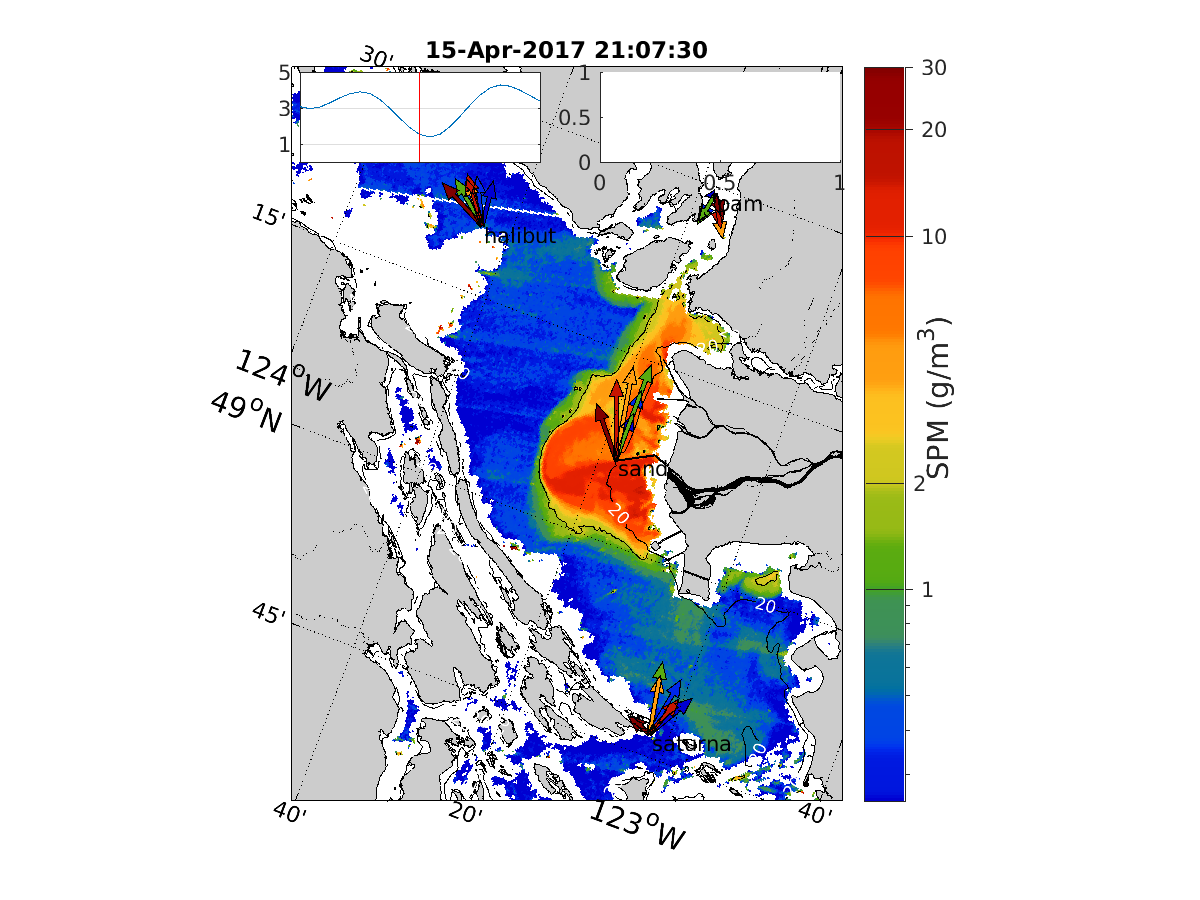

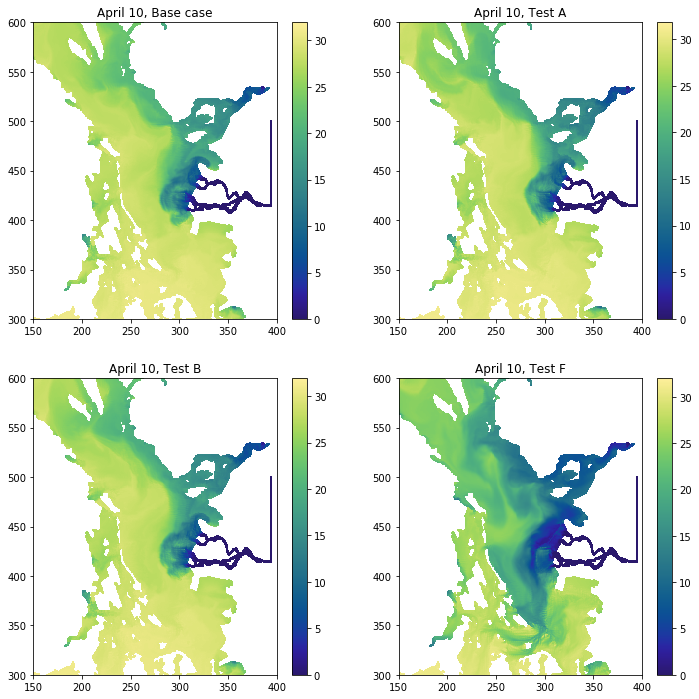

In [110]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
q = plot_plume_salinity(apr10base, ax[0,0])
q.set_title('April 10, Base case')
w = plot_plume_salinity(apr10testa, ax[0,1])
w.set_title('April 10, Test A')
e = plot_plume_salinity(apr10testb, ax[1,0])
e.set_title('April 10, Test B')
r = plot_plume_salinity(f, ax[1,1])
r.set_title('April 10, Test F')
Image('/home/vdo/Downloads/plume1.png')

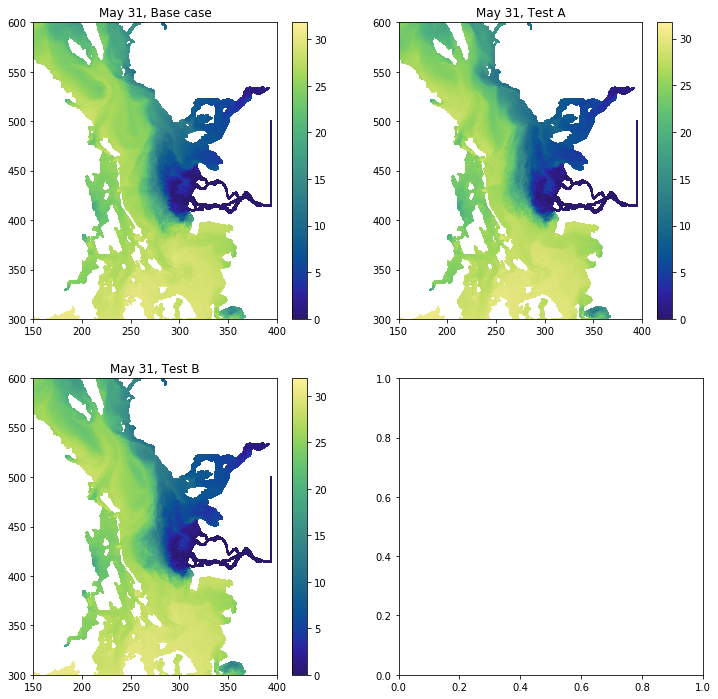

In [111]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
y = plot_plume_salinity(may31base, ax[0,0])
y.set_title('May 31, Base case')
u = plot_plume_salinity(may31testa, ax[0,1])
u.set_title('May 31, Test A')
i = plot_plume_salinity(may31testb, ax[1,0])
i.set_title('May 31, Test B')
Image('/home/vdo/Downloads/plume2.png')